In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Log Data Extraction

## server_access log

In [2]:
# Extract the IP address.
def extract_ip_address(log_line):
    if "::1 - -"  not in log_line:
        ip_address = log_line.split(' - -')[0]
        return ip_address
    else:
        return 'request was made from the same machine'

In [3]:
# Extract date and time.
def extract_date_time(log_line):
    if "::1 - -"  not in log_line:
        date_time = log_line.split(' - -')[1].split('"')[0]
        return date_time
    else:
        return 'request was made from the same machine'

In [4]:
# Extract method of request.
def extract_method_of_request(log_line):
    if "::1 - -"  not in log_line:
        method_of_request = log_line.split('"')[1]
        return method_of_request
    else:
        return 'request was made from the same machine'

In [5]:
# Extract url of request.
def extract_url(log_line):
    if "::1 - -"  not in log_line:
        request_url = log_line.split('"')[1].split(' ')[1]
        return request_url
    else:
        return 'request was made from the same machine'

In [6]:
# Extract http status code of request.
def extract_http_status_code(log_line):
    if "::1 - -"  not in log_line:
        status_code = log_line.split('"')[2]
        return status_code
    else:
        return 'request was made from the same machine'

In [7]:
# Extract number of bytes send in response
def extract_number_of_bytes_send_in_response(log_line):
    if "::1 - -"  not in i:
        number_of_bytes_send_in_respond = log_line.split(' - -')[1].split('"')[2].split(' ')[2]
        return number_of_bytes_send_in_respond
    else:
        return 'request was made from the same machine'

In [8]:
# Extract referer header.
def extract_referer_header(log_line):
    if "::1 - -"  not in log_line:
        referer_header = log_line.split(' - -')[1].split('"')[3]
        return referer_header
    else:
        return 'request was made from the same machine'

In [9]:
# Extract user agent header.
def extract_user_agent_header(log_line):
    if "::1 - -"  not in log_line:
        user_agent_header = log_line.split(' - -')[1].split('"')[-2]
        return user_agent_header
    else:
        return 'request was made from the same machine'

In [10]:
def get_access_log_data(data_dir):
    sub_dir_list=[]
    ip_address=[]
    date_time = []
    request_method=[]
    #request_url = []
    request_http_status_code = []
    #num_of_bytes_in_response = []
    referer_head=[]
    user_head = []
    for sub_dir in os.listdir(data_dir):
        sub_dir_path = os.path.join(data_dir,sub_dir)
        sub_dir_list.append(sub_dir_path)
    for file_path in sub_dir_list:
        with open(file_path, 'r') as f:
            data= f.readlines()
            ip_addrs=[extract_ip_address(i) for i in data]
            date_list=[extract_date_time(i) for i in data]
            request_methd=[extract_method_of_request(i) for i in data]
            #request_url_list=[extract_url(i) for i in data]
            request_status_code=[extract_http_status_code(i) for i in data ]
            #num_of_bytes=[extract_number_of_bytes_send_in_response(i) for i in data]
            referer=[extract_referer_header(i) for i in data]
            user_header=[extract_user_agent_header(i) for i in data]
            ip_address.append(ip_addrs)
            date_time.append(date_list)
            request_method.append(request_methd)
            #request_url.append(request_url_list)
            request_http_status_code.append(request_status_code)
            #num_of_bytes_in_response.append(num_of_bytes)
            referer_head.append(referer)
            user_head.append(user_header)
    ip=[ip for i in ip_address for ip in i]
    dt = [date for i in date_time for date in i]
    r_method=[rmethod for i in request_method for rmethod in i]
    r_status=[status for i in request_http_status_code for status in i]
    referer_agent=[refer for i in referer_head for refer in i ]
    user_agent = [ user for i in user_head for user in i]
    data= {'Ip_address':ip, 'Date_Time':dt,'Method_of_request':r_method,'Status_of_request': r_status, 'Referer_Header':referer_agent, 'User_Header':user_agent}
    df=pd.DataFrame(data)
    return df

        
            
        

In [11]:
#
access_data_dir='C:\\Users\\User\\Desktop\\cybersecurity dashboard\\cyber\\data\\access_log_data'

In [12]:
access_log_data=get_access_log_data(access_data_dir)

In [13]:
access_log_data.head()

Ip_address                       Date_Time  \
0  192.168.10.190   [29/Feb/2020:00:00:02 +0000]    
1    192.168.10.4   [29/Feb/2020:00:00:09 +0000]    
2  192.168.10.190   [29/Feb/2020:00:00:12 +0000]    
3  192.168.10.190   [29/Feb/2020:00:00:13 +0000]    
4  192.168.10.190   [29/Feb/2020:00:00:14 +0000]    

                                   Method_of_request Status_of_request  \
0                            GET /login.php HTTP/1.1         200 2532    
1  POST /services/ajax.php/kronolith/listTopTags ...          200 402    
2                           POST /login.php HTTP/1.1          302 601    
3                     GET /services/portal/ HTTP/1.1         200 7696    
4  GET /themes/default/graphics/head-bg.png HTTP/1.1          200 380    

                                  Referer_Header  \
0                                              -   
1                 http://mail.cup.com/kronolith/   
2                  http://mail.cup.com/login.php   
3                  http://mail.cup.com/login.php   
4  http://mail.cup.com/themes/default/screen.css   

                                         User_Header  
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  
2  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....

## Error log

In [226]:
 # Get the timestamp.
def get_time_stamp(log_line):
    time_stamp = log_line.split('[:error]')[0]
    return time_stamp

In [227]:
 # Get the ip_address.
def get_ip_address(log_line):
    ip_address = log_line.split(' ')[9]
    return ip_address

In [228]:
 # Get the Process ID.
def get_PID(log_line):
    pid = log_line.split(' ')[7]
    return pid

In [229]:
 # Get the referer.
def get_referer(log_line):
    referer = log_line.split(' ')[-1]
    return referer

In [230]:
def get_error_log_data(data_dir):
    sub_dir_list=[]
    ip_address=[]
    date_time = []
    progress_id=[]
    referer_head=[]
    for sub_dir in os.listdir(data_dir):
        sub_dir_path = os.path.join(data_dir,sub_dir)
        sub_dir_list.append(sub_dir_path)
    for file_path in sub_dir_list:
        with open(file_path, 'r') as f:
            data= f.readlines()
            ip_addrs=[get_ip_address(i) for i in data]
            date_list=[get_time_stamp(i) for i in data]
            pid=[get_PID(i) for i in data]
            referer=[get_referer(i) for i in data]
            ip_address.append(ip_addrs)
            date_time.append(date_list)
            progress_id.append(pid)
            referer_head.append(referer)
    ip=[ip for i in ip_address for ip in i]
    dt = [date for i in date_time for date in i]
    p_id=[pi_d for i in progress_id for pi_d in i]
    referer_agent=[refer for i in referer_head for refer in i ]
    data= {'Ip_address':ip, 'Date_Time':dt,'PID':p_id,'Referer_Header':referer_agent}
    df=pd.DataFrame(data)
    return df

        
            
        

In [231]:
# 
error_data_dir='C:\\Users\\User\\Desktop\\cybersecurity dashboard\\cyber\\data\\error_log_data'

In [232]:
error_log_data=get_error_log_data(error_data_dir)

In [233]:
error_log_data.head()

Ip_address                           Date_Time     PID  \
0  192.168.10.4:55308]  [Sun Mar 01 06:28:15.983231 2020]   32548]   
1  192.168.10.4:55308]  [Sun Mar 01 06:28:15.984200 2020]   32548]   
2  192.168.10.4:55308]  [Sun Mar 01 06:28:15.984863 2020]   32548]   
3  192.168.10.4:55308]  [Sun Mar 01 06:28:15.985763 2020]   32548]   
4  192.168.10.4:55308]  [Sun Mar 01 06:28:15.986326 2020]   32548]   

               Referer_Header  
0  http://mail.cup.com/nag/\n  
1  http://mail.cup.com/nag/\n  
2  http://mail.cup.com/nag/\n  
3  http://mail.cup.com/nag/\n  
4  http://mail.cup.com/nag/\n

## User log

In [234]:
def extract_date(log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
        if 'Next state:' in log_line:
            date=log_line.split('.')[0]
            return date
        else:
            pass
    else:
        pass

In [235]:
def extract_id(log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
        if 'Next state:' in log_line:
            time_id=log_line.split('.')[1].split(' ')[0]
            return time_id
        else:
            pass
    else:
        pass

In [236]:
def extract_next_state(log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
         if 'Next state:' in log_line:
            nt_state=log_line.split('Next state:')[-1]
            return nt_state
         else:
            pass
    else:
        pass

In [237]:
def extract_user(sub_dir,log_line):
    if not log_line.startswith(tuple([' <_','Message:'])):
        if 'Next state:' in log_line:
            user=sub_dir
            return user
        else:
            pass
    else:
        pass
    

In [238]:
def get_user_data(data_dir):
    date_lg= []
    timeid = []
    nxt_state = []
    user_list = []
    for sub_dir in os.listdir(data_dir):
        date_log= []
        time_id = []
        nxt_stage = []
        us_er=[]
        user=sub_dir
        sub_dir_path = os.path.join(data_dir,sub_dir)
        for file in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path,file)
            with open(file_path, 'r') as f:
                data= f.readlines()
                date=[extract_date(i) for i in data]
                date_id=[extract_id(i) for i in data]
                next_state=[extract_next_state(i) for i in data]
                userlist=[extract_user(sub_dir,i) for i in data]
                date_log.append(date)
                time_id.append(date_id)
                nxt_stage.append(next_state)
                us_er.append(userlist)
        dt = [d for i in date_log for d in i]
        dt_id=[d_id for i in time_id for d_id in i]
        nx_state=[ns for i in nxt_stage for ns in i]
        web_user=[us for i in us_er for us in i]
        date_lg.append(dt)
        timeid.append(dt_id)
        nxt_state.append(nx_state)
        user_list.append(web_user)
    date_lg = [d for i in date_lg for d in i]
    timeid=[d_id for i in timeid for d_id in i]
    nxt_state=[ns for i in nxt_state for ns in i]
    user_list=[u for i in user_list for u in i]
    user_data= {'Date_Time':date_lg,'Date_id':timeid,'Next_State': nxt_state,'User':user_list}
    df=pd.DataFrame(user_data)
    return df
    #len(date_lg),len(timeid),len(nxt_state)
   

In [239]:
# 
user_data_dir='C:\\Users\\User\\Desktop\\cybersecurity dashboard\\cyber\\data\\user_data'

In [240]:
user_data = get_user_data(user_data_dir)

In [241]:
user_data.head()

Date_Time Date_id                  Next_State    User
0                 None    None                        None    None
1  2020-02-28 19:14:41  123111                     Login\n  user-0
2  2020-02-28 19:14:57  244144      Personal Preferences\n  user-0
3  2020-02-28 19:15:12  950956   Mail Delete Preferences\n  user-0
4  2020-02-28 19:16:43  522902                      Home\n  user-0

## Attack log

In [242]:
def extract_attack_date(log_line):
    date=log_line.split('UTC 2020')[0]
    return date

In [243]:
def extract_attack_status(log_line):
    status=log_line.split('UTC 2020')[1]
    return status

In [244]:
def extract_attack_user(sub_dir,log_line):
    user=sub_dir
    return user

In [245]:
def get_attack_data(data_dir):
    date_lg= []
    status = []
    user_list = []
    for sub_dir in os.listdir(data_dir):
        date_log= []
        stat = []
        us_er=[]
        user=sub_dir
        sub_dir_path = os.path.join(data_dir,sub_dir)
        for file in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path,file)
            with open(file_path, 'r') as f:
                data= f.readlines()
                date=[extract_attack_date(i) for i in data]
                attack_stat=[extract_attack_status(i) for i in data]
                userlist=[extract_attack_user(sub_dir,i) for i in data]
                date_log.append(date)
                stat.append(attack_stat)
                us_er.append(userlist)

        dt = [d for i in date_log for d in i]
        attk_stat=[s for i in stat for s in i]
        web_user=[us for i in us_er for us in i]
        date_lg.append(dt)
        status.append(attk_stat)
        user_list.append(web_user)
    date_lg = [d for i in date_lg for d in i]
    status=[s for i in status for s in i]
    user_list=[u for i in user_list for u in i]
    user_data= {'Date_Time':date_lg,'Status':status,'User':user_list}
    df=pd.DataFrame(user_data)
    return df
    #len(date_lg),len(timeid),len(nxt_state)
   

In [246]:
# 
attack_data_dir= 'C:\\Users\\User\\Desktop\\cybersecurity dashboard\\cyber\\data\\attack_data'

In [247]:
attack_data=get_attack_data(attack_data_dir)

In [248]:
attack_data.head()

Date_Time                   Status    User
0  Wed Mar 4 12:37:51    okay-upload-webshell\n  user-4
1  Wed Mar 4 12:37:51                 success\n  user-4
2  Wed Mar 4 12:38:05               okay-curl\n  user-4
3  Wed Mar 4 12:38:05                 success\n  user-4
4  Wed Mar 4 13:51:47                    nmap\n  user-4

# Log Data Cleaning and Preparation

## server_access log

In [249]:
access_log_data.head()

Ip_address                       Date_Time  \
0  192.168.10.190   [29/Feb/2020:00:00:02 +0000]    
1    192.168.10.4   [29/Feb/2020:00:00:09 +0000]    
2  192.168.10.190   [29/Feb/2020:00:00:12 +0000]    
3  192.168.10.190   [29/Feb/2020:00:00:13 +0000]    
4  192.168.10.190   [29/Feb/2020:00:00:14 +0000]    

                                   Method_of_request Status_of_request  \
0                            GET /login.php HTTP/1.1         200 2532    
1  POST /services/ajax.php/kronolith/listTopTags ...          200 402    
2                           POST /login.php HTTP/1.1          302 601    
3                     GET /services/portal/ HTTP/1.1         200 7696    
4  GET /themes/default/graphics/head-bg.png HTTP/1.1          200 380    

                                  Referer_Header  \
0                                              -   
1                 http://mail.cup.com/kronolith/   
2                  http://mail.cup.com/login.php   
3                  http://mail.cup.com/login.php   
4  http://mail.cup.com/themes/default/screen.css   

                                         User_Header  
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  
2  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....

In [250]:
access_log_data.Ip_address.unique()

array(['192.168.10.190', '192.168.10.4',
       'request was made from the same machine', '192.168.10.238',
       '192.168.10.200', '192.168.10.18', '192.168.10.98',
       '192.168.10.161', '192.168.10.185', '192.168.10.81',
       '192.168.10.130', '192.168.10.194'], dtype=object)

In [251]:
access_data=access_log_data[access_log_data.Ip_address!='request was made from the same machine'].reset_index(drop=True)

In [252]:
access_data.Status_of_request[11].split(' ')


['', '200', '8808', '']

In [253]:
def status_code(data):
    status=data[:3]
    return status

In [254]:
def respond_byte(data):
    res_byte=data[3:]
    return res_byte

In [255]:
def request_method(data):
    request_method=data.split(' ')[0]
    return request_method

In [256]:
def request_url(data):
    url=data.split(' ')[-2]
    return url

In [257]:
def remove_bracket(data):
    data=data.replace('[',' ')
    data=data.replace(']',' ')
    return data
    

In [261]:
def remove_space(data):
    data=data.replace('  ',"")
    data=data.replace(' ',"")
    return data

In [262]:
access_data.Date_Time=access_data.Date_Time.apply(lambda x:remove_bracket(x))
access_data.Date_Time=access_data.Date_Time.apply(lambda x:remove_space(x))

In [263]:
access_data['Request_Method']=access_data.Method_of_request.apply(lambda x:request_method(x))
access_data['Request_status']=access_data.Status_of_request.apply(lambda x:remove_space(x))
access_data.Request_status=access_data.Request_status.apply(lambda x:status_code(x))
access_data['Response_byte']=access_data.Status_of_request.apply(lambda x:remove_space(x))
access_data.Response_byte=access_data.Response_byte.apply(lambda x:respond_byte(x))


In [264]:
access_data.head()

Ip_address                  Date_Time  \
0  192.168.10.190  29/Feb/2020:00:00:02+0000   
1    192.168.10.4  29/Feb/2020:00:00:09+0000   
2  192.168.10.190  29/Feb/2020:00:00:12+0000   
3  192.168.10.190  29/Feb/2020:00:00:13+0000   
4  192.168.10.190  29/Feb/2020:00:00:14+0000   

                                   Method_of_request Status_of_request  \
0                            GET /login.php HTTP/1.1         200 2532    
1  POST /services/ajax.php/kronolith/listTopTags ...          200 402    
2                           POST /login.php HTTP/1.1          302 601    
3                     GET /services/portal/ HTTP/1.1         200 7696    
4  GET /themes/default/graphics/head-bg.png HTTP/1.1          200 380    

                                  Referer_Header  \
0                                              -   
1                 http://mail.cup.com/kronolith/   
2                  http://mail.cup.com/login.php   
3                  http://mail.cup.com/login.php   
4  http://mail.cup.com/themes/default/screen.css   

                                         User_Header Request_Method  \
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            GET   
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...           POST   
2  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....           POST   
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            GET   
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            GET   

  Request_status Response_byte  
0            200          2532  
1            200           402  
2            302           601  
3            200          7696  
4            200           380

In [265]:
access_data.columns

Index(['Ip_address', 'Date_Time', 'Method_of_request', 'Status_of_request',
       'Referer_Header', 'User_Header', 'Request_Method', 'Request_status',
       'Response_byte'],
      dtype='object')

In [266]:
access_data=access_data[['Ip_address', 'Date_Time', 'Method_of_request', 'Request_Method', 'Request_status','Referer_Header', 'User_Header']]

In [267]:
access_data.Date_Time=access_data.Date_Time.apply(lambda x:x.split(':')[0])

In [268]:
access_data['Date_Time']=pd.to_datetime(access_data['Date_Time'])

In [269]:
access_data.Request_Method.unique()

array(['GET', 'POST', '-', 'HEAD', 'PUT', 'OPTIONS', 'DEBUG', 'PROPFIND',
       'TRACE', 'TRACK', 'get', 'INDEX', 'SEARCH',
       '<script>alert(1)</script>'], dtype=object)

In [270]:
access_data.Referer_Header.replace('-','Anonymous Referer', inplace = True)

In [271]:
access_data.Request_Method.replace('-','Anonymous Referer', inplace = True)

In [272]:
access_data.head()

Ip_address  Date_Time  \
0  192.168.10.190 2020-02-29   
1    192.168.10.4 2020-02-29   
2  192.168.10.190 2020-02-29   
3  192.168.10.190 2020-02-29   
4  192.168.10.190 2020-02-29   

                                   Method_of_request Request_Method  \
0                            GET /login.php HTTP/1.1            GET   
1  POST /services/ajax.php/kronolith/listTopTags ...           POST   
2                           POST /login.php HTTP/1.1           POST   
3                     GET /services/portal/ HTTP/1.1            GET   
4  GET /themes/default/graphics/head-bg.png HTTP/1.1            GET   

  Request_status                                 Referer_Header  \
0            200                              Anonymous Referer   
1            200                 http://mail.cup.com/kronolith/   
2            302                  http://mail.cup.com/login.php   
3            200                  http://mail.cup.com/login.php   
4            200  http://mail.cup.com/themes/default/screen.css   

                                         User_Header  
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  
2  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....  
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....

In [273]:
access_data.Request_Method=access_data.Request_Method.apply(lambda x: x.upper())


In [274]:
request_dict={'GET':'Safe', 'POST':'Safe', 'ANONYMOUS REFERER':'Suspected attack', 'HEAD':'Safe', 'PUT':'Malicious', 'OPTIONS':'Safe', 'DEBUG':'Malicious', 'PROPFIND':'Suspected attack', 'TRACE':'Suspected attack', 'TRACK':'Suspected attack', 'INDEX':'Suspected attack', 'SEARCH':'Suspected attack','<SCRIPT>ALERT(1)</SCRIPT>':'Suspected attack'}

access_data['Security_status']=access_data.Request_Method.map(request_dict)

#access_data.Security_status.unique()


In [275]:
#Check IP distribution: Identify IPs with the highest access frequency and flag those with abnormal behavior

unsafe_stat =['Suspected attack','Malicious']
unsafe_access=access_data[access_data.Security_status.isin(unsafe_stat)].reset_index(drop=True)

ip_with_unsafe_access=unsafe_access.groupby(['Ip_address','Security_status'])['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

## Error data log

In [276]:
error_log_data.head()

Ip_address                           Date_Time     PID  \
0  192.168.10.4:55308]  [Sun Mar 01 06:28:15.983231 2020]   32548]   
1  192.168.10.4:55308]  [Sun Mar 01 06:28:15.984200 2020]   32548]   
2  192.168.10.4:55308]  [Sun Mar 01 06:28:15.984863 2020]   32548]   
3  192.168.10.4:55308]  [Sun Mar 01 06:28:15.985763 2020]   32548]   
4  192.168.10.4:55308]  [Sun Mar 01 06:28:15.986326 2020]   32548]   

               Referer_Header  
0  http://mail.cup.com/nag/\n  
1  http://mail.cup.com/nag/\n  
2  http://mail.cup.com/nag/\n  
3  http://mail.cup.com/nag/\n  
4  http://mail.cup.com/nag/\n

In [277]:
error_log_data.Ip_address=error_log_data.Ip_address.apply(lambda x:remove_bracket(x))
error_log_data.Ip_address=error_log_data.Ip_address.apply(lambda x:x.split(':')[0])

In [278]:
error_log_data.Date_Time=error_log_data.Date_Time.apply(lambda x:remove_bracket(x))
error_log_data.Date_Time=error_log_data.Date_Time.apply(lambda x:x.split('06:')[0])

In [279]:
error_log_data.PID=error_log_data.PID.apply(lambda x:remove_bracket(x))

In [280]:
error_log_data

Ip_address     Date_Time     PID                   Referer_Header
0      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n
1      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n
2      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n
3      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n
4      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n
..              ...           ...     ...                              ...
636  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n
637  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n
638  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n
639  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n
640  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n

[641 rows x 4 columns]

## user_data 

In [281]:
user_data.Date_Time[0]

In [282]:
user_data=user_data.fillna(0)

In [283]:
user_data=user_data[user_data.Date_Time!=0].reset_index(drop=True)

In [284]:
user_data.Date_Time[0]

'2020-02-28 19:14:41'

In [285]:
user_data.Date_Time=user_data.Date_Time.apply(lambda x:x.split(' ')[0])

In [286]:
user_data

Date_Time Date_id                  Next_State    User
0       2020-02-28  123111                     Login\n  user-0
1       2020-02-28  244144      Personal Preferences\n  user-0
2       2020-02-28  950956   Mail Delete Preferences\n  user-0
3       2020-02-28  522902                      Home\n  user-0
4       2020-02-28  807088          MenuBarSelection\n  user-0
...            ...     ...                         ...     ...
476453  2020-03-06  632661          NewCalendarEvent\n  user-9
476454  2020-03-06  658098                      Home\n  user-9
476455  2020-03-06  526480          MenuBarSelection\n  user-9
476456  2020-03-06  526653                    Logout\n  user-9
476457  2020-03-06  773555                      Idle\n  user-9

[476458 rows x 4 columns]

In [287]:
user_data['Date_Time']=pd.to_datetime(user_data['Date_Time'])

In [288]:
user_data.head()

Date_Time Date_id                  Next_State    User
0 2020-02-28  123111                     Login\n  user-0
1 2020-02-28  244144      Personal Preferences\n  user-0
2 2020-02-28  950956   Mail Delete Preferences\n  user-0
3 2020-02-28  522902                      Home\n  user-0
4 2020-02-28  807088          MenuBarSelection\n  user-0

In [289]:
## Attack Data

In [290]:
attack_data.head()

Date_Time                   Status    User
0  Wed Mar 4 12:37:51    okay-upload-webshell\n  user-4
1  Wed Mar 4 12:37:51                 success\n  user-4
2  Wed Mar 4 12:38:05               okay-curl\n  user-4
3  Wed Mar 4 12:38:05                 success\n  user-4
4  Wed Mar 4 13:51:47                    nmap\n  user-4

# Exploratory Data Analysis

In [79]:
access_data.shape, error_log_data.shape, user_data.shape, attack_data.shape

((483832, 8), (641, 4), (476458, 4), (443, 3))

## access log data

In [80]:
access_data.head()

Ip_address  Date_Time  \
0  192.168.10.190 2020-02-29   
1    192.168.10.4 2020-02-29   
2  192.168.10.190 2020-02-29   
3  192.168.10.190 2020-02-29   
4  192.168.10.190 2020-02-29   

                                   Method_of_request Request_Method  \
0                            GET /login.php HTTP/1.1            GET   
1  POST /services/ajax.php/kronolith/listTopTags ...           POST   
2                           POST /login.php HTTP/1.1           POST   
3                     GET /services/portal/ HTTP/1.1            GET   
4  GET /themes/default/graphics/head-bg.png HTTP/1.1            GET   

  Request_status                                 Referer_Header  \
0            200                              Anonymous Referer   
1            200                 http://mail.cup.com/kronolith/   
2            302                  http://mail.cup.com/login.php   
3            200                  http://mail.cup.com/login.php   
4            200  http://mail.cup.com/themes/default/screen.css   

                                         User_Header Security_status  
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...            Safe  
2  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe

In [81]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483832 entries, 0 to 483831
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Ip_address         483832 non-null  object        
 1   Date_Time          483832 non-null  datetime64[ns]
 2   Method_of_request  483832 non-null  object        
 3   Request_Method     483832 non-null  object        
 4   Request_status     483832 non-null  object        
 5   Referer_Header     483832 non-null  object        
 6   User_Header        483832 non-null  object        
 7   Security_status    483832 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 29.5+ MB


## Exploring Access Patterns
- Analyze request methods: Count the occurrences of different request methods (GET, POST, etc.).
- Study request statuses: Investigate the distribution of response status codes (e.g., 200 OK, 404 Not Found).
- Examine access over time: Plot the access frequency over time to identify spikes or anomalies

In [82]:
access_data.head(1)

Ip_address  Date_Time        Method_of_request Request_Method  \
0  192.168.10.190 2020-02-29  GET /login.php HTTP/1.1            GET   

  Request_status     Referer_Header  \
0            200  Anonymous Referer   

                                         User_Header Security_status  
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe

In [83]:
log_acess_over_time = access_data.groupby('Date_Time')['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

In [84]:
log_acess_over_time

Date_Time  Counts
0 2020-02-29   67861
1 2020-03-01   70201
2 2020-03-02   78047
3 2020-03-03   76021
4 2020-03-04  103544
5 2020-03-05   82281
6 2020-03-06    5877

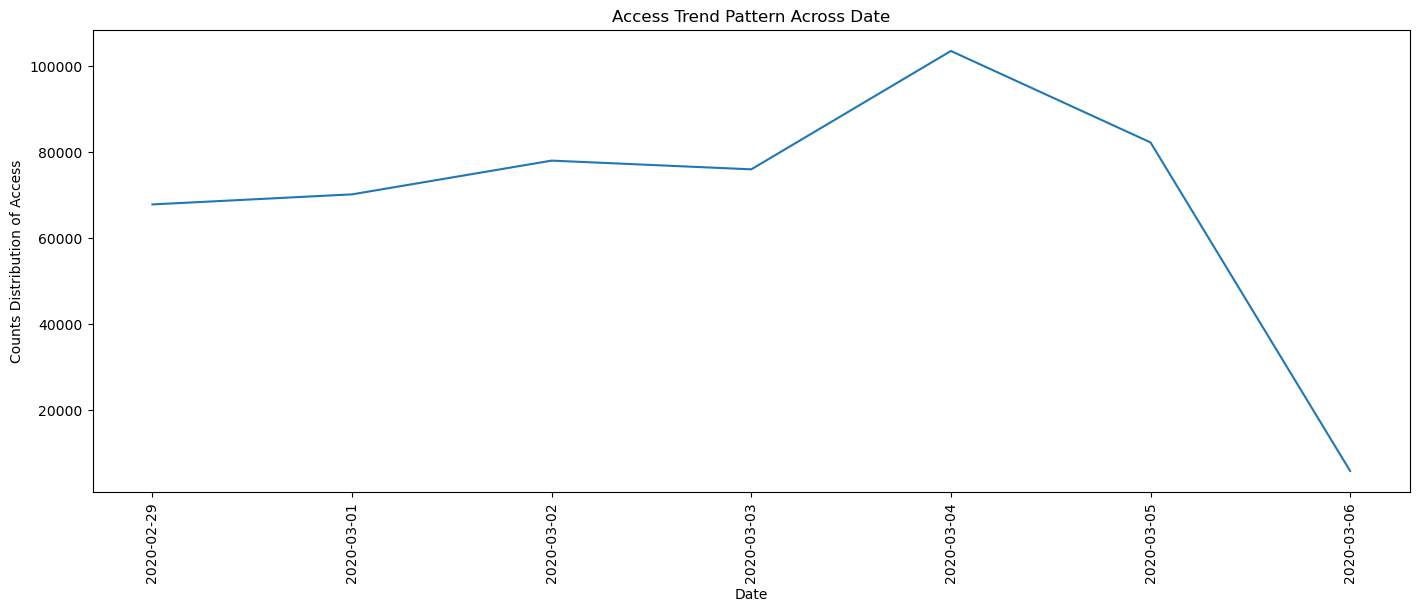

In [85]:
plt.figure(figsize = (17,6))
ax=sns.lineplot(x=log_acess_over_time['Date_Time'],y=log_acess_over_time['Counts'])
plt.title('Access Trend Pattern Across Date')
plt.xlabel('Date')
plt.ylabel('Counts Distribution of Access')
plt.xticks(rotation = 90);
plt.show()

In [86]:
unique_IP_distribution = access_data.groupby('Ip_address')['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

In [87]:
unique_IP_distribution

Ip_address  Counts
0    192.168.10.18  146854
1   192.168.10.185   71334
2   192.168.10.190   60664
3   192.168.10.130   48548
4    192.168.10.81   40499
5   192.168.10.238   40248
6     192.168.10.4   28484
7    192.168.10.98   17798
8   192.168.10.200   12751
9   192.168.10.194    8642
10  192.168.10.161    8010

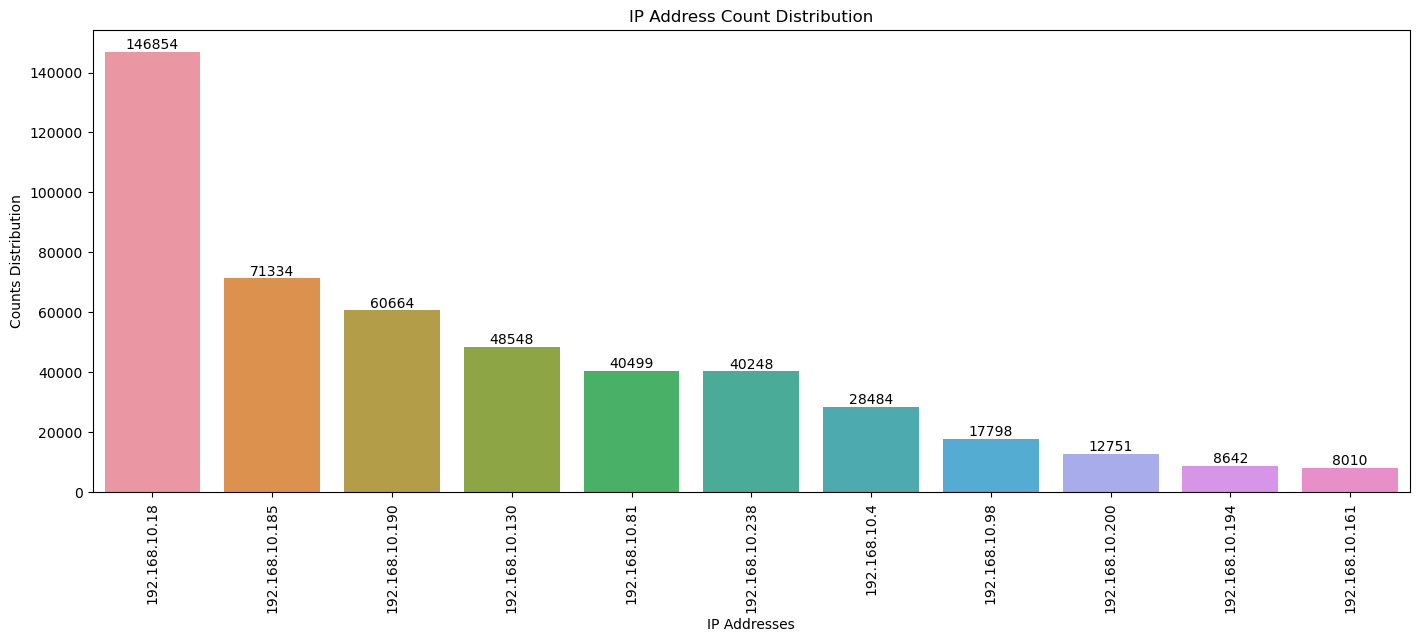

In [88]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=unique_IP_distribution['Ip_address'],y=unique_IP_distribution['Counts'])
ax.bar_label(ax.containers[0])
plt.title('IP Address Count Distribution')
plt.xlabel('IP Addresses')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [89]:
request_method_df = access_data.groupby('Request_Method')['Request_Method'].count().to_frame().rename(columns={'Request_Method':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

In [90]:
request_method_df.head()

Request_Method  Counts
0            GET  326678
1           POST  157087
2        OPTIONS      12
3           HEAD       8
4          TRACE       8

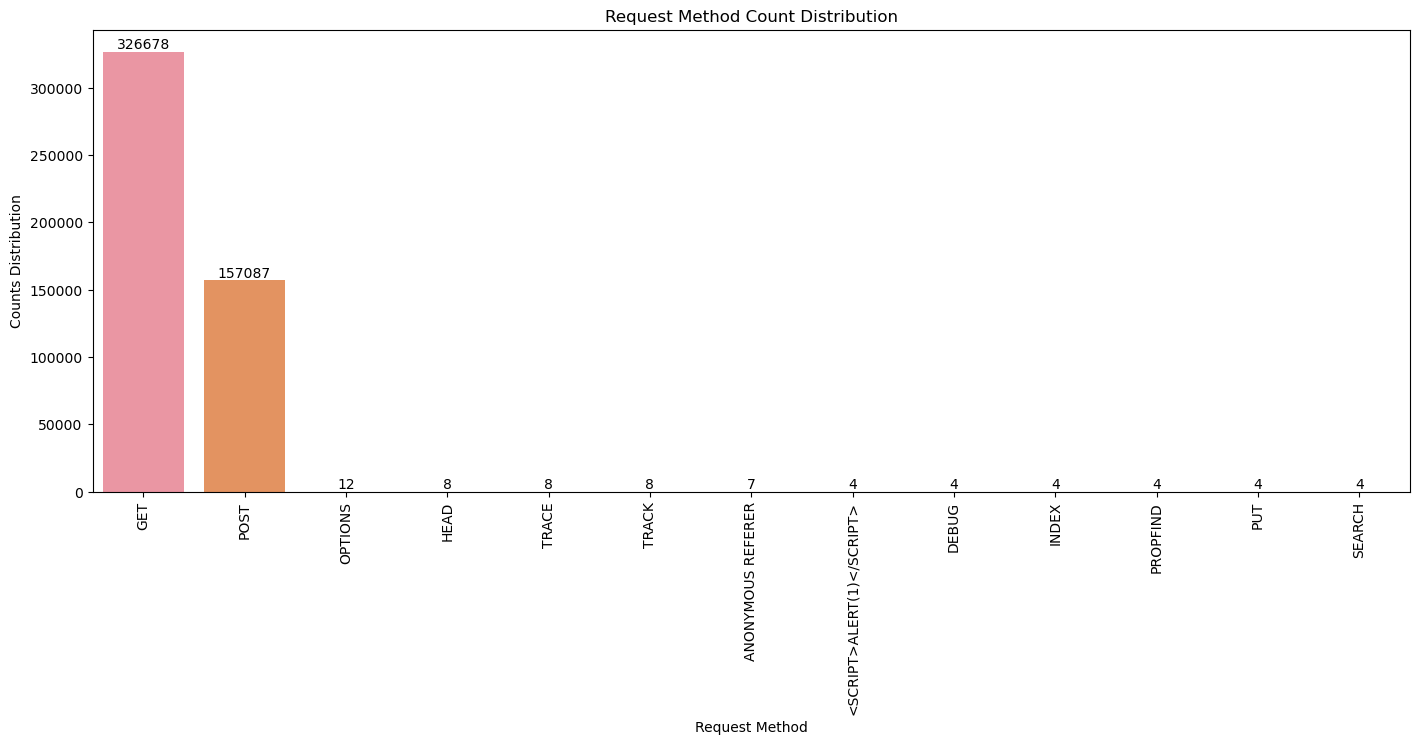

In [91]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=request_method_df['Request_Method'],y=request_method_df['Counts'])
ax.bar_label(ax.containers[0])
plt.title('Request Method Count Distribution')
plt.xlabel('Request Method')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [92]:
request_status_df=access_data.groupby('Request_status')['Request_status'].count().to_frame().rename(columns={'Request_status':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

In [93]:
request_status_df[:10]

Request_status  Counts
0            200  424056
1            302   42630
2            400   12577
3            304    3889
4            ><s     164
5            403     160
6            404     103
7            ./.      52
8            <sc      40
9            Vul      36

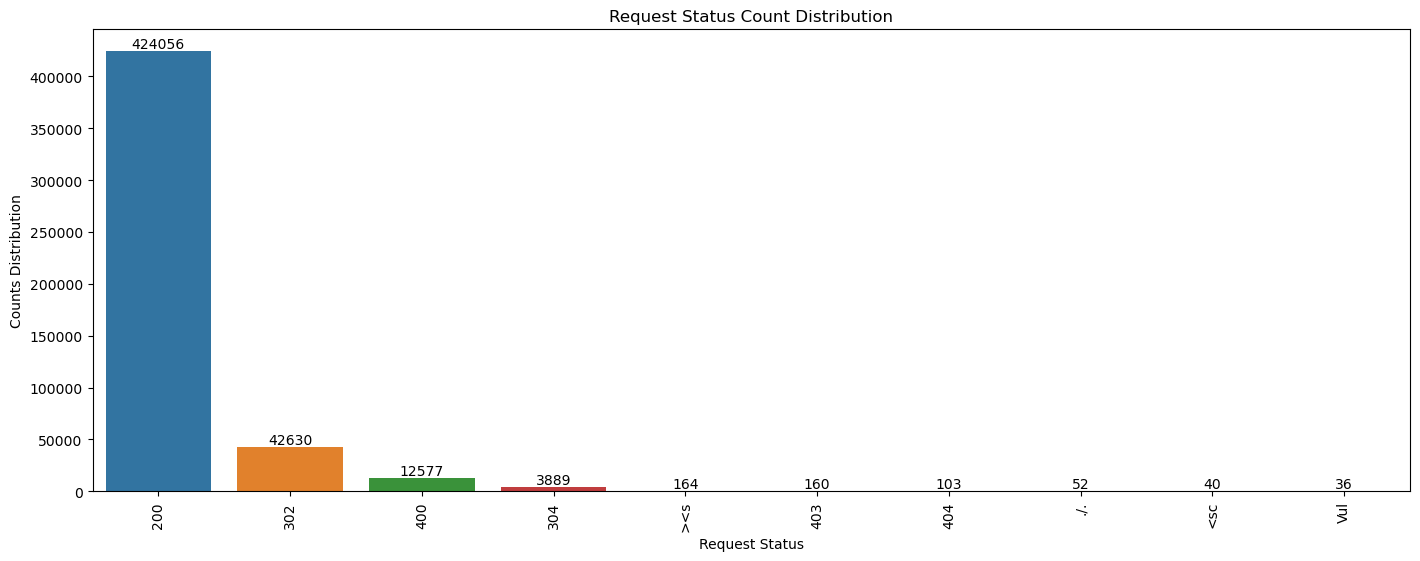

In [94]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=request_status_df['Request_status'][:10],y=request_status_df['Counts'][:10])
ax.bar_label(ax.containers[0])
plt.title('Request Status Count Distribution')
plt.xlabel('Request Status')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [95]:
referer_header_df=access_data.groupby('Referer_Header')['Referer_Header'].count().to_frame().rename(columns={'Referer_Header':'Counts'}).reset_index().sort_values("Counts", axis = 0, ascending = False, na_position ='last').reset_index(drop = True)

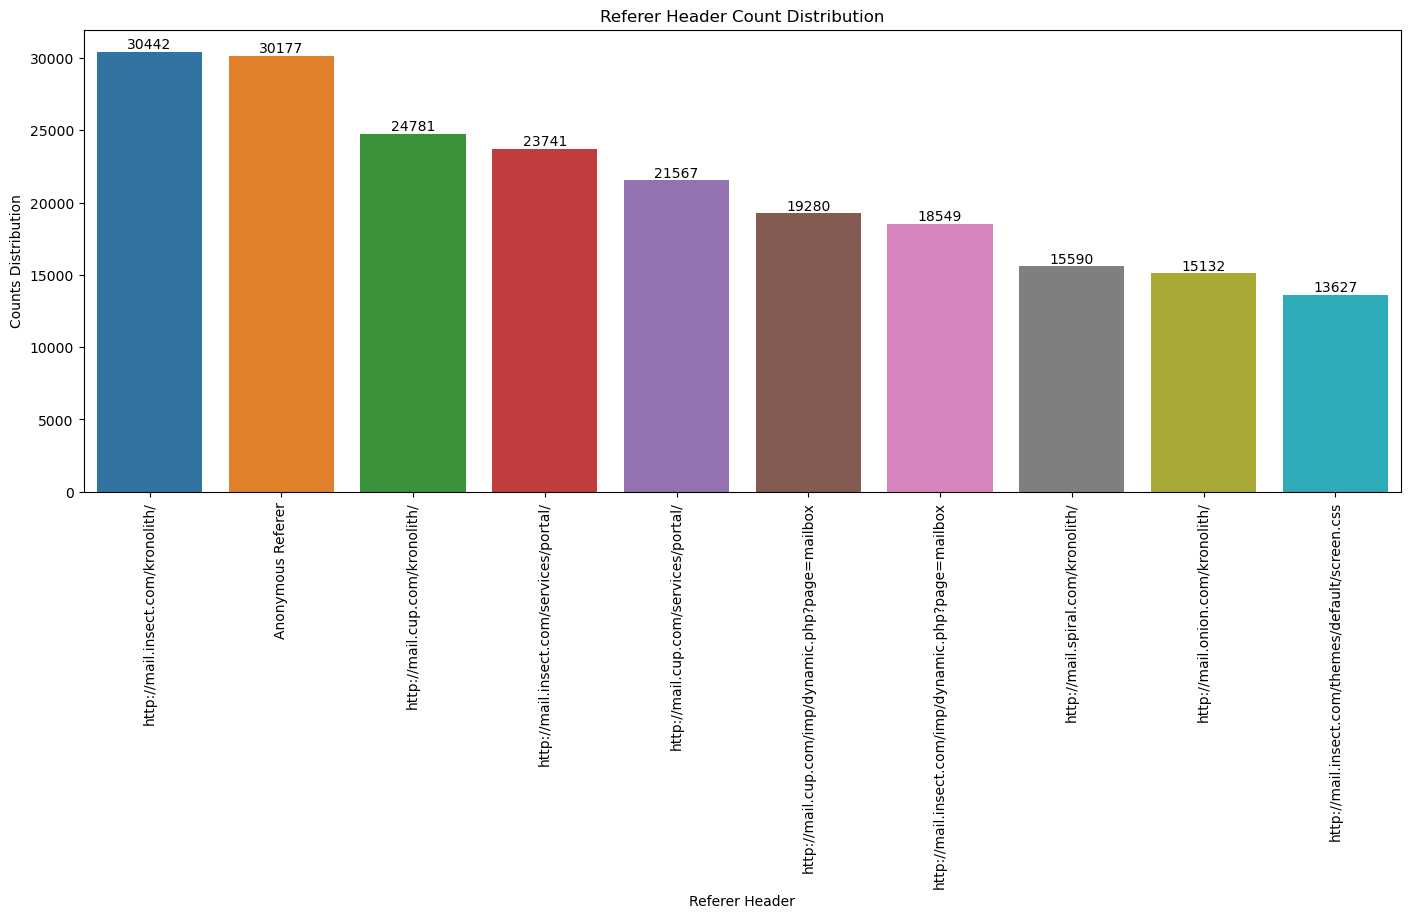

In [96]:
plt.figure(figsize = (17,6))
ax=sns.barplot(x=referer_header_df['Referer_Header'][:10],y=referer_header_df['Counts'][:10])
ax.bar_label(ax.containers[0])
plt.title('Referer Header Count Distribution')
plt.xlabel('Referer Header')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## Identifying Suspicious Activity
- Check IP distribution: Identify IPs with the highest access frequency and flag those with abnormal behavior (e.g., too many requests in a short period).



In [97]:
access_data.Request_Method=access_data.Request_Method.apply(lambda x: x.upper())

In [98]:
request_dict={'GET':'Safe', 'POST':'Safe', 'ANONYMOUS REFERER':'Suspected attack', 'HEAD':'Safe', 'PUT':'Malicious', 'OPTIONS':'Safe', 'DEBUG':'Malicious', 'PROPFIND':'Suspected attack', 'TRACE':'Suspected attack', 'TRACK':'Suspected attack', 'INDEX':'Suspected attack', 'SEARCH':'Suspected attack','<SCRIPT>ALERT(1)</SCRIPT>':'Suspected attack'}

In [99]:
access_data['Security_status']=access_data.Request_Method.map(request_dict)

In [100]:
access_data.Security_status.unique()

array(['Safe', 'Suspected attack', 'Malicious'], dtype=object)

- Check IP distribution: Identify IPs with the highest access frequency and flag those with abnormal behavior

In [101]:
unsafe_stat =['Suspected attack','Malicious']
unsafe_access=access_data[access_data.Security_status.isin(unsafe_stat)].reset_index(drop=True)

In [102]:
ip_with_unsafe_access=unsafe_access.groupby(['Ip_address','Security_status'])['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

In [103]:
ip_with_unsafe_access

Ip_address   Security_status  Counts
0   192.168.10.18         Malicious       2
1   192.168.10.18  Suspected attack      11
2  192.168.10.185         Malicious       2
3  192.168.10.185  Suspected attack      10
4  192.168.10.238         Malicious       2
5  192.168.10.238  Suspected attack       8
6    192.168.10.4  Suspected attack       2
7   192.168.10.81         Malicious       2
8   192.168.10.81  Suspected attack       8

In [104]:
unsafe_access

Ip_address  Date_Time                         Method_of_request  \
0     192.168.10.4 2020-02-29                                         -   
1     192.168.10.4 2020-02-29                                         -   
2   192.168.10.238 2020-03-04    PUT /nikto-test-yAQbJ6Gp.html HTTP/1.1   
3   192.168.10.238 2020-03-04                          DEBUG / HTTP/1.1   
4   192.168.10.238 2020-03-04                       PROPFIND / HTTP/1.1   
5   192.168.10.238 2020-03-04                          TRACE / HTTP/1.0   
6   192.168.10.238 2020-03-04                          TRACE / HTTP/1.0   
7   192.168.10.238 2020-03-04                          TRACK / HTTP/1.0   
8   192.168.10.238 2020-03-04                          TRACK / HTTP/1.0   
9   192.168.10.238 2020-03-04                          INDEX / HTTP/1.1   
10  192.168.10.238 2020-03-04                         SEARCH / HTTP/1.1   
11  192.168.10.238 2020-03-04      <script>alert(1)</script> / HTTP/1.1   
12   192.168.10.18 2020-02-29                                         -   
13   192.168.10.18 2020-02-29                                         -   
14   192.168.10.18 2020-02-29                                         -   
15   192.168.10.18 2020-03-04  PUT /./nikto-test-ea4UKqHY.html HTTP/1.1   
16   192.168.10.18 2020-03-04                        DEBUG /./ HTTP/1.1   
17   192.168.10.18 2020-03-04                     PROPFIND /./ HTTP/1.1   
18   192.168.10.18 2020-03-04                        TRACE /./ HTTP/1.0   
19   192.168.10.18 2020-03-04                        TRACE /./ HTTP/1.0   
20   192.168.10.18 2020-03-04                        TRACK /./ HTTP/1.0   
21   192.168.10.18 2020-03-04                        TRACK /./ HTTP/1.0   
22   192.168.10.18 2020-03-04                        INDEX /./ HTTP/1.1   
23   192.168.10.18 2020-03-04                       SEARCH /./ HTTP/1.1   
24   192.168.10.18 2020-03-04    <script>alert(1)</script> /./ HTTP/1.1   
25  192.168.10.185 2020-03-01                                         -   
26  192.168.10.185 2020-03-04    PUT /nikto-test-RnOtenLA.html HTTP/1.1   
27  192.168.10.185 2020-03-04                          DEBUG / HTTP/1.1   
28  192.168.10.185 2020-03-04                       PROPFIND / HTTP/1.1   
29  192.168.10.185 2020-03-04                          TRACE / HTTP/1.0   
30  192.168.10.185 2020-03-04                          TRACE / HTTP/1.0   
31  192.168.10.185 2020-03-04                          TRACK / HTTP/1.0   
32  192.168.10.185 2020-03-04                          TRACK / HTTP/1.0   
33  192.168.10.185 2020-03-04                          INDEX / HTTP/1.1   
34  192.168.10.185 2020-03-04                         SEARCH / HTTP/1.1   
35  192.168.10.185 2020-03-04      <script>alert(1)</script> / HTTP/1.1   
36  192.168.10.185 2020-03-05                                         -   
37   192.168.10.81 2020-03-04    PUT /nikto-test-oYZkrRR9.html HTTP/1.1   
38   192.168.10.81 2020-03-04                          DEBUG / HTTP/1.1   
39   192.168.10.81 2020-03-04                       PROPFIND / HTTP/1.1   
40   192.168.10.81 2020-03-04                          TRACE / HTTP/1.0   
41   192.168.10.81 2020-03-04                          TRACE / HTTP/1.0   
42   192.168.10.81 2020-03-04                          TRACK / HTTP/1.0   
43   192.168.10.81 2020-03-04                          TRACK / HTTP/1.0   
44   192.168.10.81 2020-03-04                          INDEX / HTTP/1.1   
45   192.168.10.81 2020-03-04                         SEARCH / HTTP/1.1   
46   192.168.10.81 2020-03-04      <script>alert(1)</script> / HTTP/1.1   

               Request_Method Request_status     Referer_Header  \
0           ANONYMOUS REFERER            408  Anonymous Referer   
1           ANONYMOUS REFERER            408  Anonymous Referer   
2                         PUT            400  Anonymous Referer   
3                       DEBUG            400  Anonymous Referer   
4                    PROPFIND            400  Anonymous Referer   
5    

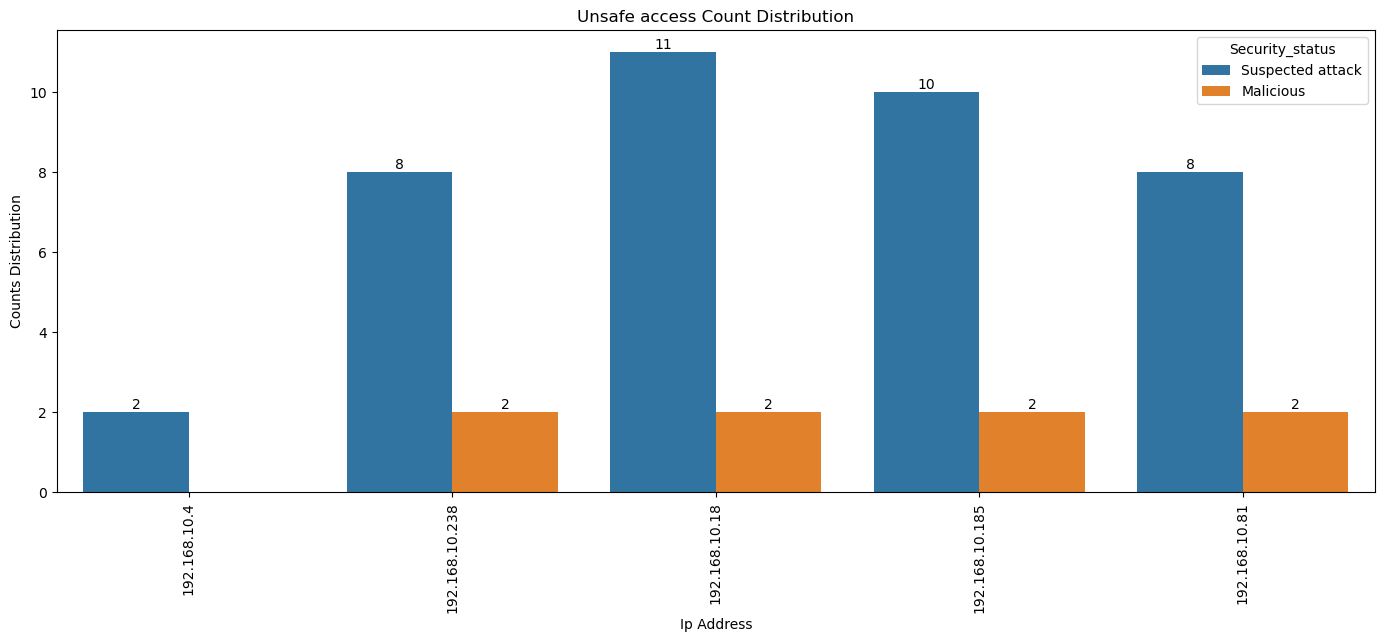

In [105]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=unsafe_access['Ip_address'], hue=unsafe_access['Security_status'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Unsafe access Count Distribution')
plt.xlabel('Ip Address')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

In [106]:
valid_request=['200', '302', '408', '304', '400', '417', '405', '404','403','301']

In [107]:
valid_req_dict = {'200':'Successful', '302':'Found', '408':'Request Timeout:', '304':' Not Modified', '400':'Bad Request', '417':'Expectation Failed', '405':'Method Not Allowed', '404':'Not Found', '403':'Forbidden', '301':'Moved Permanently'}

In [108]:
valid_req_dict.get('200')

'Successful'

In [109]:
access_data['Class_of_Request_status']=access_data.Request_status.apply(lambda x: valid_req_dict.get(x) if x in valid_request else 'Suspicious Request' )

In [110]:
access_data.Class_of_Request_status.unique()

array(['Successful', 'Found', 'Request Timeout:', ' Not Modified',
       'Bad Request', 'Suspicious Request', 'Expectation Failed',
       'Method Not Allowed', 'Not Found', 'Forbidden',
       'Moved Permanently'], dtype=object)

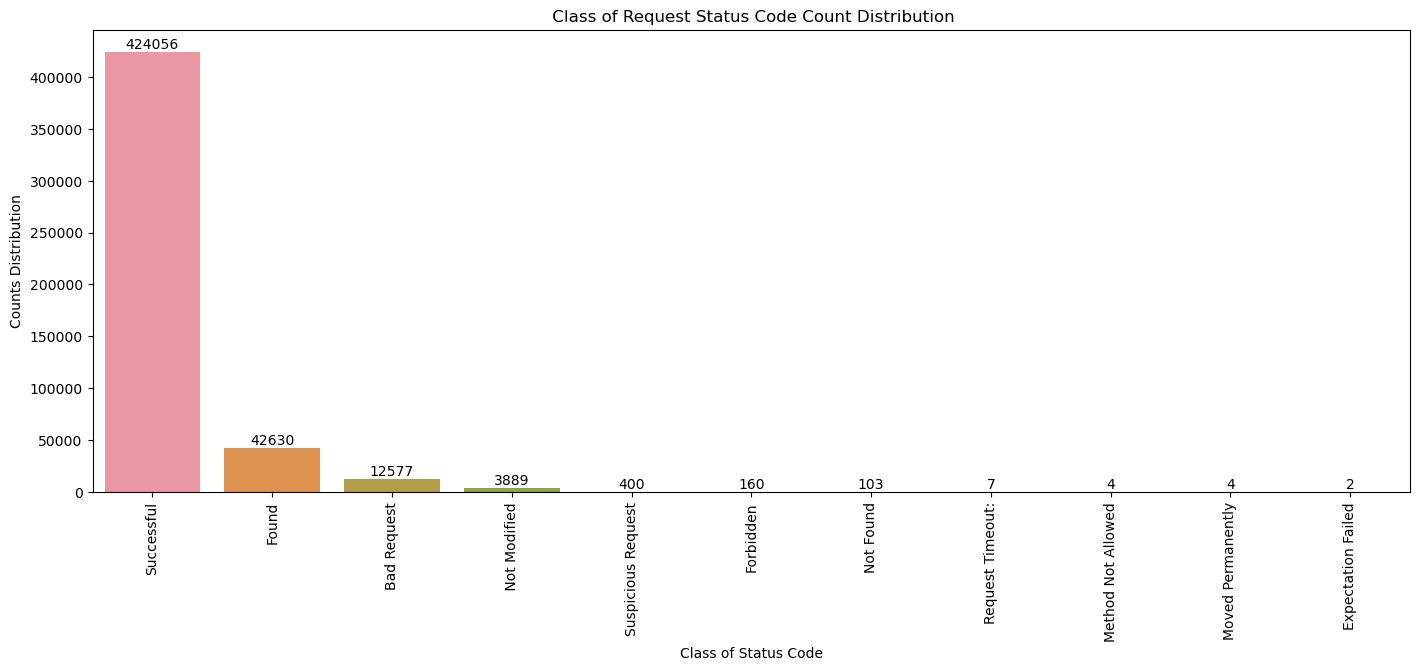

In [111]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=access_data['Class_of_Request_status'], order=access_data["Class_of_Request_status"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title(' Class of Request Status Code Count Distribution')
plt.xlabel('Class of Status Code')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

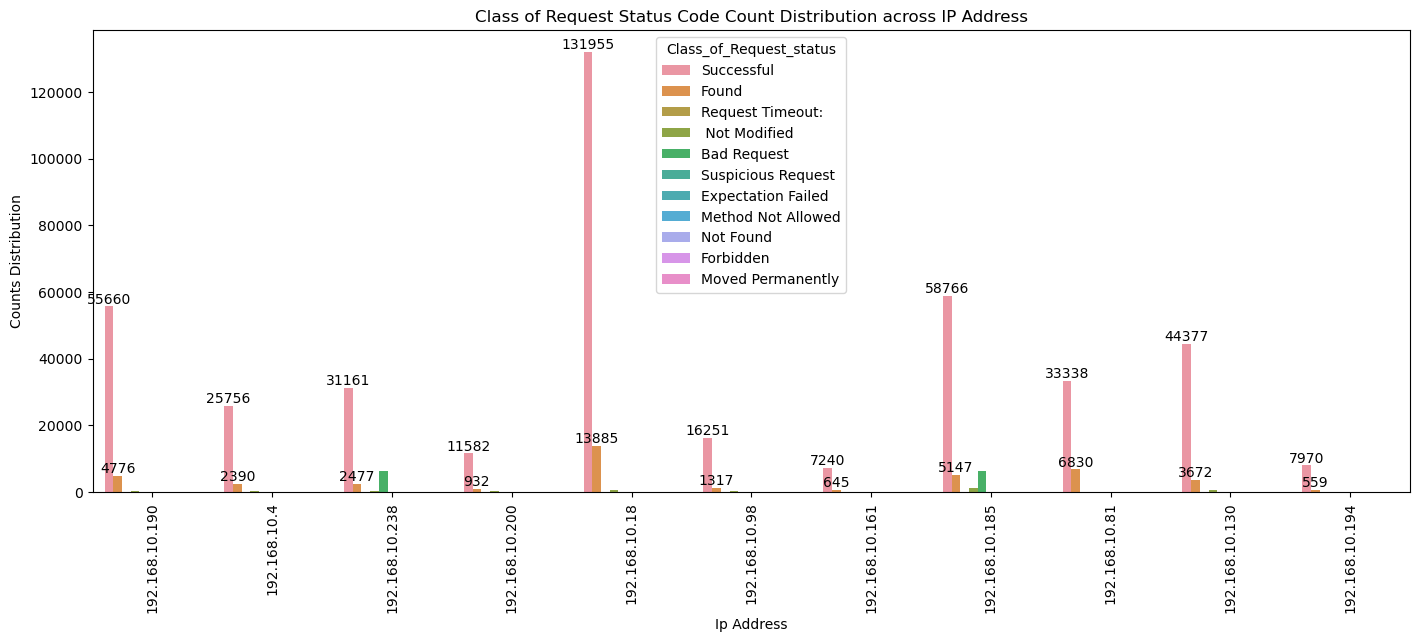

In [112]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=access_data['Ip_address'], hue=access_data['Class_of_Request_status'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Class of Request Status Code Count Distribution across IP Address')
plt.xlabel('Ip Address')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

# Error data eda

In [291]:
error_log_data.head()

Ip_address     Date_Time     PID              Referer_Header
0  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
1  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
2  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
3  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
4  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n

In [114]:
unique_IP_distribution_for_error_data = error_log_data.groupby('Ip_address')['Ip_address'].count().to_frame().rename(columns={'Ip_address':'Counts'}).reset_index()

In [115]:
unique_IP_distribution_for_error_data

Ip_address  Counts
0  192.168.10.130      72
1  192.168.10.161      18
2   192.168.10.18     209
3  192.168.10.185      74
4  192.168.10.190      54
5  192.168.10.238      20
6    192.168.10.4      18
7   192.168.10.81     158
8   192.168.10.98      18

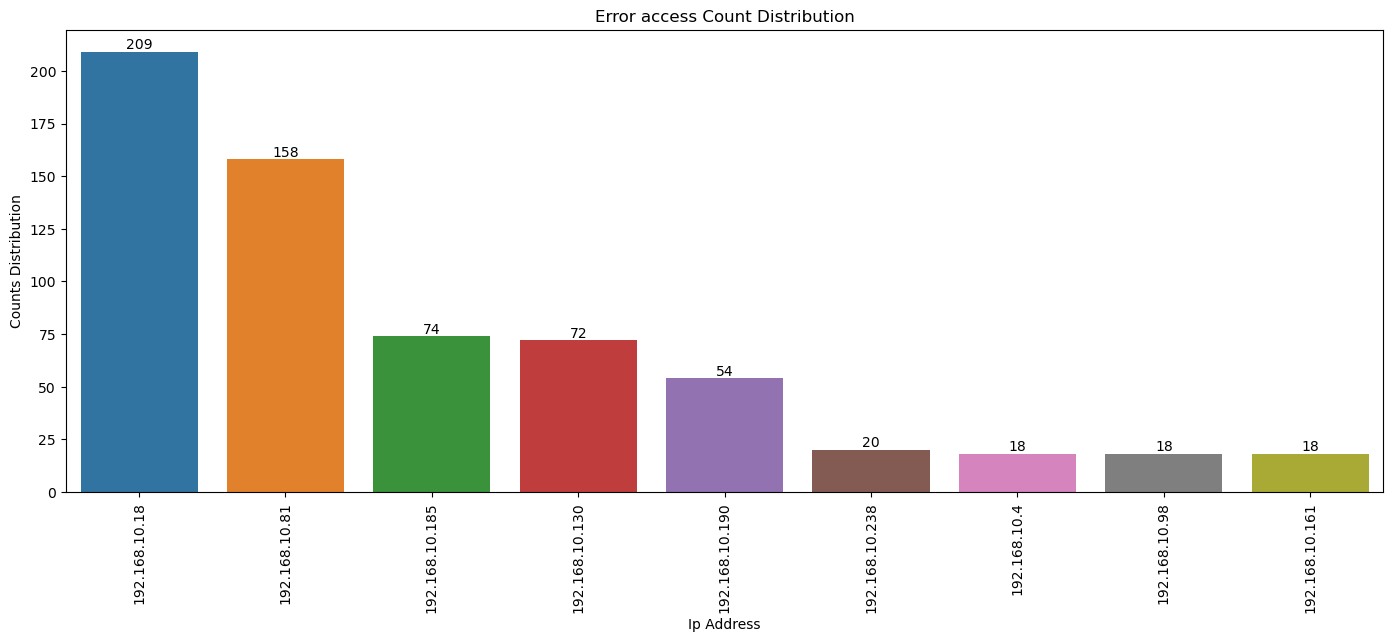

In [116]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=error_log_data['Ip_address'],  order=error_log_data["Ip_address"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('Error access Count Distribution')
plt.xlabel('Ip Address')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## User log data

In [117]:
user_data.head()

Date_Time Date_id                  Next_State    User
0 2020-02-28  123111                     Login\n  user-0
1 2020-02-28  244144      Personal Preferences\n  user-0
2 2020-02-28  950956   Mail Delete Preferences\n  user-0
3 2020-02-28  522902                      Home\n  user-0
4 2020-02-28  807088          MenuBarSelection\n  user-0

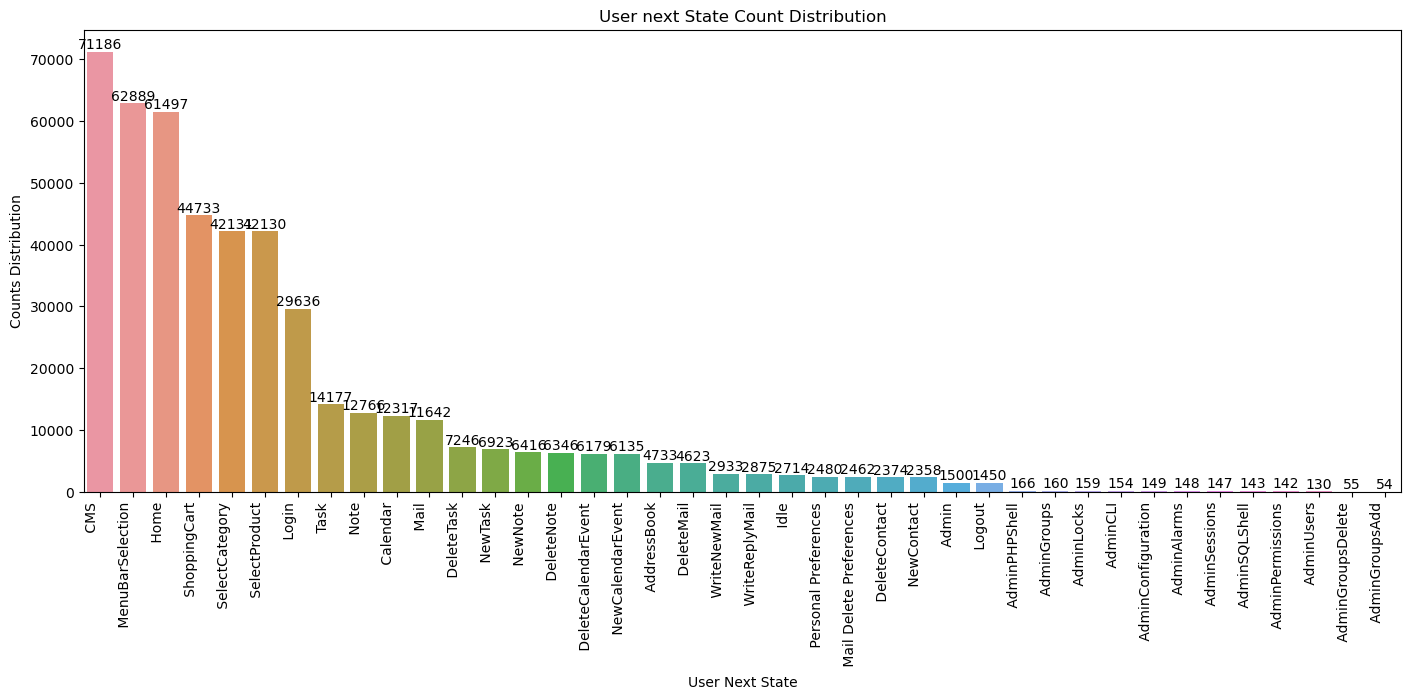

In [118]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=user_data['Next_State'], order=user_data["Next_State"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('User next State Count Distribution')
plt.xlabel('User Next State')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

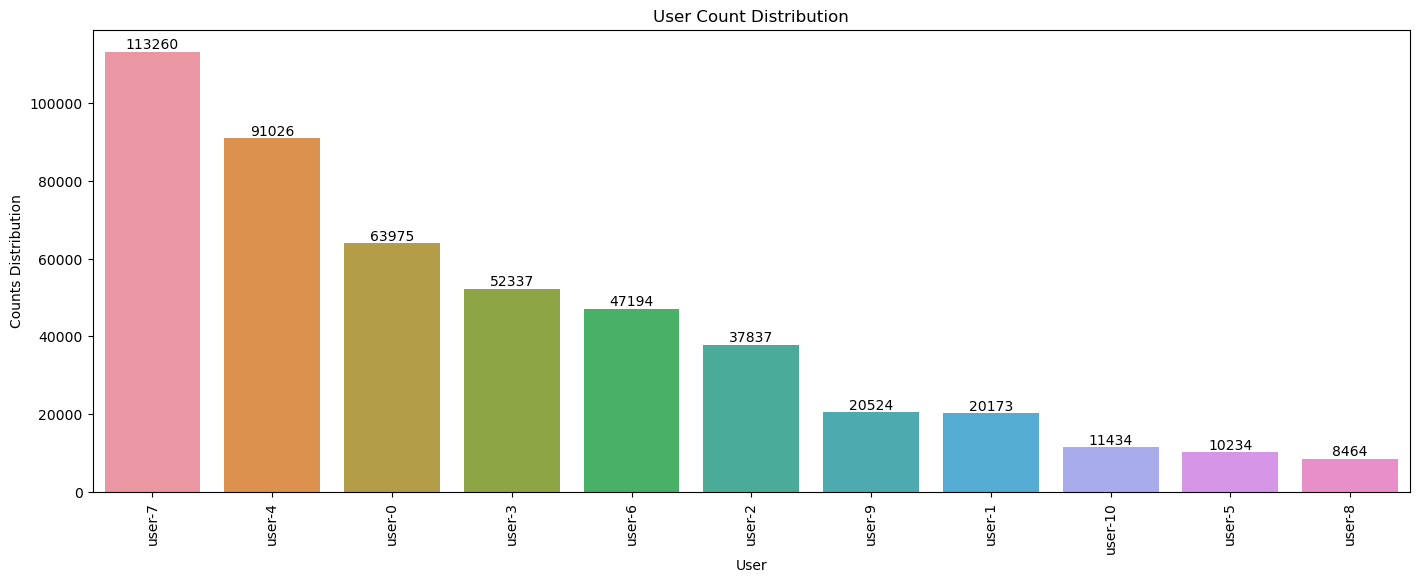

In [119]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=user_data['User'],  order=user_data["User"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('User Count Distribution')
plt.xlabel('User')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## Exploring User Behavior:

- Analyze next state frequencies: Calculate the frequency of each "next state" (web page) to identify the most visited pages.


## Attack data eda

In [120]:
attack_data.head()

Date_Time                   Status    User
0  Wed Mar 4 12:37:51    okay-upload-webshell\n  user-4
1  Wed Mar 4 12:37:51                 success\n  user-4
2  Wed Mar 4 12:38:05               okay-curl\n  user-4
3  Wed Mar 4 12:38:05                 success\n  user-4
4  Wed Mar 4 13:51:47                    nmap\n  user-4

In [121]:
attack_data.Status.nunique()

62

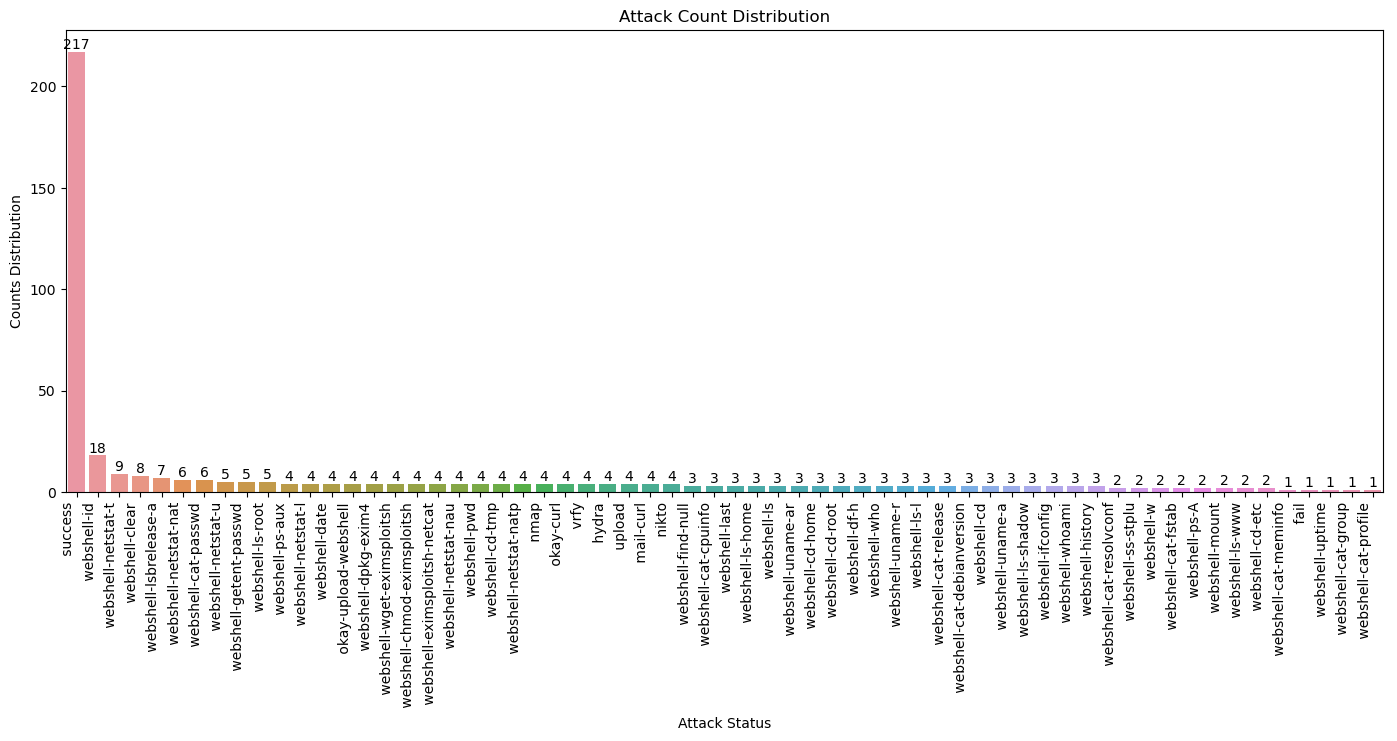

In [122]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=attack_data['Status'], order=attack_data["Status"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('Attack Count Distribution')
plt.xlabel('Attack Status')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

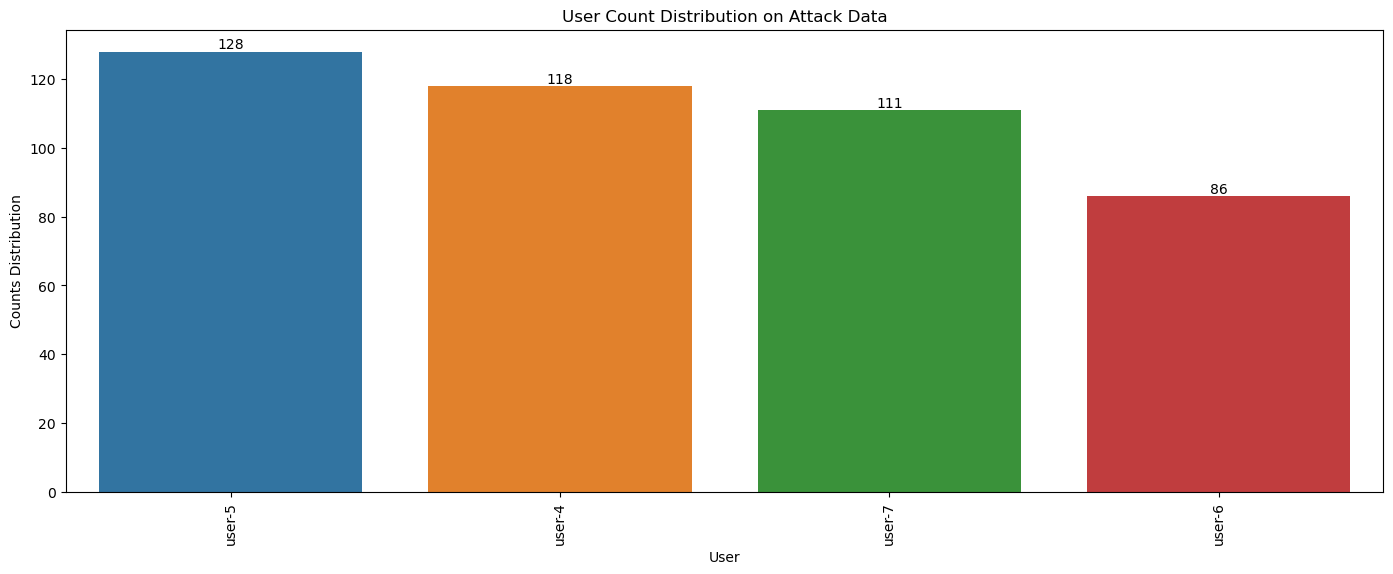

In [123]:
plt.figure(figsize = (17,6))
ax=sns.countplot(x=attack_data['User'], order=attack_data["User"].value_counts().index)
ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.title('User Count Distribution on Attack Data')
plt.xlabel('User')
plt.ylabel('Counts Distribution')
plt.xticks(rotation = 90);
plt.show()

## Data for Dashboard

In [292]:
access_data.head()

Ip_address  Date_Time  \
0  192.168.10.190 2020-02-29   
1    192.168.10.4 2020-02-29   
2  192.168.10.190 2020-02-29   
3  192.168.10.190 2020-02-29   
4  192.168.10.190 2020-02-29   

                                   Method_of_request Request_Method  \
0                            GET /login.php HTTP/1.1            GET   
1  POST /services/ajax.php/kronolith/listTopTags ...           POST   
2                           POST /login.php HTTP/1.1           POST   
3                     GET /services/portal/ HTTP/1.1            GET   
4  GET /themes/default/graphics/head-bg.png HTTP/1.1            GET   

  Request_status                                 Referer_Header  \
0            200                              Anonymous Referer   
1            200                 http://mail.cup.com/kronolith/   
2            302                  http://mail.cup.com/login.php   
3            200                  http://mail.cup.com/login.php   
4            200  http://mail.cup.com/themes/default/screen.css   

                                         User_Header Security_status  
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...            Safe  
2  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe

In [293]:
access_data.to_csv('access_data.csv')

In [294]:
error_log_data.head()

Ip_address     Date_Time     PID              Referer_Header
0  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
1  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
2  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
3  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n
4  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n

In [295]:
error_log_data.to_csv('error_log_data.csv')

In [296]:
user_data.head()

Date_Time Date_id                  Next_State    User
0 2020-02-28  123111                     Login\n  user-0
1 2020-02-28  244144      Personal Preferences\n  user-0
2 2020-02-28  950956   Mail Delete Preferences\n  user-0
3 2020-02-28  522902                      Home\n  user-0
4 2020-02-28  807088          MenuBarSelection\n  user-0

In [297]:
user_data.to_csv('user_data.csv')

In [298]:
attack_data.head()

Date_Time                   Status    User
0  Wed Mar 4 12:37:51    okay-upload-webshell\n  user-4
1  Wed Mar 4 12:37:51                 success\n  user-4
2  Wed Mar 4 12:38:05               okay-curl\n  user-4
3  Wed Mar 4 12:38:05                 success\n  user-4
4  Wed Mar 4 13:51:47                    nmap\n  user-4

In [299]:
attack_data.to_csv('attack_data.csv')

In [300]:
access_data.head()

Ip_address  Date_Time  \
0  192.168.10.190 2020-02-29   
1    192.168.10.4 2020-02-29   
2  192.168.10.190 2020-02-29   
3  192.168.10.190 2020-02-29   
4  192.168.10.190 2020-02-29   

                                   Method_of_request Request_Method  \
0                            GET /login.php HTTP/1.1            GET   
1  POST /services/ajax.php/kronolith/listTopTags ...           POST   
2                           POST /login.php HTTP/1.1           POST   
3                     GET /services/portal/ HTTP/1.1            GET   
4  GET /themes/default/graphics/head-bg.png HTTP/1.1            GET   

  Request_status                                 Referer_Header  \
0            200                              Anonymous Referer   
1            200                 http://mail.cup.com/kronolith/   
2            302                  http://mail.cup.com/login.php   
3            200                  http://mail.cup.com/login.php   
4            200  http://mail.cup.com/themes/default/screen.css   

                                         User_Header Security_status  
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...            Safe  
2  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe  
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe

In [301]:
access_data.Referer_Header[3].startswith('http://')

True

In [302]:
def referer_source(x):
    if x.startswith('http://'):
        referer=x.split('.')[1]
    else:
        referer= 'Suspected Malicious Referer'
    return referer

In [303]:
access_data['Server_Source']= access_data.Referer_Header.apply(lambda x: referer_source(x))

In [304]:
access_data.Server_Source.unique()

array(['Suspected Malicious Referer', 'cup', 'insect', 'onion', 'spiral'],
      dtype=object)

In [305]:
error_log_data.Referer_Header

0           http://mail.cup.com/nag/\n
1           http://mail.cup.com/nag/\n
2           http://mail.cup.com/nag/\n
3           http://mail.cup.com/nag/\n
4           http://mail.cup.com/nag/\n
                    ...               
636    http://mail.spiral.com/turba/\n
637    http://mail.spiral.com/turba/\n
638    http://mail.spiral.com/turba/\n
639    http://mail.spiral.com/turba/\n
640    http://mail.spiral.com/turba/\n
Name: Referer_Header, Length: 641, dtype: object

In [306]:
error_log_data['Server_Source']= error_log_data.Referer_Header.apply(lambda x: referer_source(x))

In [307]:
error_log_data.Date_Time[0].split(' ')

['', 'Sun', 'Mar', '01', '']

In [308]:
error_log_data['day']=error_log_data.Date_Time.apply(lambda x: x.split(' ')[3])
error_log_data['Month']=error_log_data.Date_Time.apply(lambda x: x.split(' ')[2])
error_log_data['Year']=error_log_data.Date_Time.apply(lambda x: 2020)

In [309]:
error_log_data

Ip_address     Date_Time     PID                   Referer_Header  \
0      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
1      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
2      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
3      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
4      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
..              ...           ...     ...                              ...   
636  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
637  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
638  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
639  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
640  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   

    Server_Source day Month  Year  
0             cup  01   Mar  2020  
1             cup  01   Mar  2020  
2             cup  01   Mar  2020  
3             cup  01   Mar  2020  
4             cup  01   Mar  2020  
..            ...  ..   ...   ...  
636        spiral  05   Mar  2020  
637        spiral  05   Mar  2020  
638        spiral  05   Mar  2020  
639        spiral  05   Mar  2020  
640        spiral  05   Mar  2020  

[641 rows x 8 columns]

In [325]:
attack_data.Date_Time[0].split(' ')[1]

'Mar'

In [311]:
attack_data['day']=attack_data.Date_Time.apply(lambda x: x.split(' ')[2])
attack_data['Month']=attack_data.Date_Time.apply(lambda x: x.split(' ')[1])
attack_data['Year']=attack_data.Date_Time.apply(lambda x: 2020)

In [312]:
error_log_data.Month.unique()

array(['Mar'], dtype=object)

In [321]:
attack_data.Month.unique()

array(['Mar'], dtype=object)

In [328]:
error_log_data['Month']=error_log_data.Month.apply(lambda x: '03')

In [329]:
error_log_data

Ip_address     Date_Time     PID                   Referer_Header  \
0      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
1      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
2      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
3      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
4      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
..              ...           ...     ...                              ...   
636  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
637  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
638  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
639  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
640  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   

    Server_Source day Month  Year  
0             cup  01    03  2020  
1             cup  01    03  2020  
2             cup  01    03  2020  
3             cup  01    03  2020  
4             cup  01    03  2020  
..            ...  ..   ...   ...  
636        spiral  05    03  2020  
637        spiral  05    03  2020  
638        spiral  05    03  2020  
639        spiral  05    03  2020  
640        spiral  05    03  2020  

[641 rows x 8 columns]

In [330]:
error_log_data.Year=error_log_data.Year.astype(str).tolist()
error_log_data.Month=error_log_data.Month.astype(str).tolist()
error_log_data.day=error_log_data.day.astype(str).tolist()

In [331]:
error_log_data['Date'] = [' '.join([error_log_data.Year[i],'-', error_log_data.Month[i],'-', error_log_data.day[i]]) for i in range(len(error_log_data.Month))]

In [332]:
error_log_data['day'].unique()

array(['01', '02', '03', '04', '05'], dtype=object)

In [220]:
# def replace_nan(x):
#     if 'nan' in x:
#         replace_value = x.replace('nan', '03')
#     else:
#         replace_value = x
#     return replace_value

In [221]:
# error_log_data['Date']=error_log_data['Date'].apply(lambda x: replace_nan(x))

In [333]:
error_log_data['Date'] = pd.to_datetime(error_log_data['Date'])


In [334]:
error_log_data

Ip_address     Date_Time     PID                   Referer_Header  \
0      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
1      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
2      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
3      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
4      192.168.10.4   Sun Mar 01   32548        http://mail.cup.com/nag/\n   
..              ...           ...     ...                              ...   
636  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
637  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
638  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
639  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   
640  192.168.10.130   Thu Mar 05   14982   http://mail.spiral.com/turba/\n   

    Server_Source day Month  Year       Date  
0             cup  01    03  2020 2020-03-01  
1             cup  01    03  2020 2020-03-01  
2             cup  01    03  2020 2020-03-01  
3             cup  01    03  2020 2020-03-01  
4             cup  01    03  2020 2020-03-01  
..            ...  ..   ...   ...        ...  
636        spiral  05    03  2020 2020-03-05  
637        spiral  05    03  2020 2020-03-05  
638        spiral  05    03  2020 2020-03-05  
639        spiral  05    03  2020 2020-03-05  
640        spiral  05    03  2020 2020-03-05  

[641 rows x 9 columns]

In [335]:
attack_data.head()

Date_Time                   Status    User day Month  Year
0  Wed Mar 4 12:37:51    okay-upload-webshell\n  user-4   4   Mar  2020
1  Wed Mar 4 12:37:51                 success\n  user-4   4   Mar  2020
2  Wed Mar 4 12:38:05               okay-curl\n  user-4   4   Mar  2020
3  Wed Mar 4 12:38:05                 success\n  user-4   4   Mar  2020
4  Wed Mar 4 13:51:47                    nmap\n  user-4   4   Mar  2020

In [336]:
attack_data['Month']=attack_data.Month.apply(lambda x: '03')

In [337]:
attack_data.Year=attack_data.Year.astype(str).tolist()
attack_data.Month=attack_data.Month.astype(str).tolist()
attack_data.day=attack_data.day.astype(str).tolist()

In [338]:
attack_data['Date'] = [' '.join([attack_data.Year[i],'-', attack_data.Month[i],'-', attack_data.day[i]]) for i in range(len(attack_data.Month))]

In [339]:
attack_data

Date_Time                   Status    User day Month  Year  \
0    Wed Mar 4 12:37:51    okay-upload-webshell\n  user-4   4    03  2020   
1    Wed Mar 4 12:37:51                 success\n  user-4   4    03  2020   
2    Wed Mar 4 12:38:05               okay-curl\n  user-4   4    03  2020   
3    Wed Mar 4 12:38:05                 success\n  user-4   4    03  2020   
4    Wed Mar 4 13:51:47                    nmap\n  user-4   4    03  2020   
..                   ...                      ...     ...  ..   ...   ...   
438  Wed Mar 4 19:04:40                 success\n  user-7   4    03  2020   
439  Wed Mar 4 21:04:09    okay-upload-webshell\n  user-7   4    03  2020   
440  Wed Mar 4 21:04:09                 success\n  user-7   4    03  2020   
441  Wed Mar 4 21:04:24               okay-curl\n  user-7   4    03  2020   
442  Wed Mar 4 21:04:24                 success\n  user-7   4    03  2020   

              Date  
0    2020 - 03 - 4  
1    2020 - 03 - 4  
2    2020 - 03 - 4  
3    2020 - 03 - 4  
4    2020 - 03 - 4  
..             ...  
438  2020 - 03 - 4  
439  2020 - 03 - 4  
440  2020 - 03 - 4  
441  2020 - 03 - 4  
442  2020 - 03 - 4  

[443 rows x 7 columns]

In [340]:
attack_data['Date'] = pd.to_datetime(attack_data['Date'])

In [343]:
attack_data['Status'] = attack_data.Status.apply(lambda x: x.split('\n')[0])

In [344]:
attack_data

Date_Time                 Status    User day Month  Year  \
0    Wed Mar 4 12:37:51    okay-upload-webshell  user-4   4    03  2020   
1    Wed Mar 4 12:37:51                 success  user-4   4    03  2020   
2    Wed Mar 4 12:38:05               okay-curl  user-4   4    03  2020   
3    Wed Mar 4 12:38:05                 success  user-4   4    03  2020   
4    Wed Mar 4 13:51:47                    nmap  user-4   4    03  2020   
..                   ...                    ...     ...  ..   ...   ...   
438  Wed Mar 4 19:04:40                 success  user-7   4    03  2020   
439  Wed Mar 4 21:04:09    okay-upload-webshell  user-7   4    03  2020   
440  Wed Mar 4 21:04:09                 success  user-7   4    03  2020   
441  Wed Mar 4 21:04:24               okay-curl  user-7   4    03  2020   
442  Wed Mar 4 21:04:24                 success  user-7   4    03  2020   

          Date  
0   2020-03-04  
1   2020-03-04  
2   2020-03-04  
3   2020-03-04  
4   2020-03-04  
..         ...  
438 2020-03-04  
439 2020-03-04  
440 2020-03-04  
441 2020-03-04  
442 2020-03-04  

[443 rows x 7 columns]

In [347]:
access_data.head(1)

Ip_address  Date_Time        Method_of_request Request_Method  \
0  192.168.10.190 2020-02-29  GET /login.php HTTP/1.1            GET   

  Request_status     Referer_Header  \
0            200  Anonymous Referer   

                                         User_Header Security_status  \
0  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....            Safe   

                 Server_Source  
0  Suspected Malicious Referer

In [348]:
access_data.columns

Index(['Ip_address', 'Date_Time', 'Method_of_request', 'Request_Method',
       'Request_status', 'Referer_Header', 'User_Header', 'Security_status',
       'Server_Source'],
      dtype='object')

In [349]:
server_access_data=access_data[['Date_Time','Ip_address','Request_Method','Request_status','Security_status','Referer_Header','Server_Source']]

In [350]:
server_access_data

Date_Time      Ip_address Request_Method Request_status  \
0      2020-02-29  192.168.10.190            GET            200   
1      2020-02-29    192.168.10.4           POST            200   
2      2020-02-29  192.168.10.190           POST            302   
3      2020-02-29  192.168.10.190            GET            200   
4      2020-02-29  192.168.10.190            GET            200   
...           ...             ...            ...            ...   
483827 2020-03-06   192.168.10.81            GET            200   
483828 2020-03-06   192.168.10.81           POST            302   
483829 2020-03-06   192.168.10.81            GET            200   
483830 2020-03-06   192.168.10.81            GET            200   
483831 2020-03-06   192.168.10.81            GET            200   

       Security_status                                     Referer_Header  \
0                 Safe                                  Anonymous Referer   
1                 Safe                     http://mail.cup.com/kronolith/   
2                 Safe                      http://mail.cup.com/login.php   
3                 Safe                      http://mail.cup.com/login.php   
4                 Safe      http://mail.cup.com/themes/default/screen.css   
...                ...                                                ...   
483827            Safe                      http://mail.spiral.com/turba/   
483828            Safe               http://mail.spiral.com/turba/add.php   
483829            Safe               http://mail.spiral.com/turba/add.php   
483830            Safe  http://mail.spiral.com/turba/contact.php?sourc...   
483831            Safe            http://mail.spiral.com/services/portal/   

                      Server_Source  
0       Suspected Malicious Referer  
1                               cup  
2                               cup  
3                               cup  
4                               cup  
...                             ...  
483827                       spiral  
483828                       spiral  
483829                       spiral  
483830                       spiral  
483831                       spiral  

[483832 rows x 7 columns]

In [351]:
error_log_data.head(1)

Ip_address     Date_Time     PID              Referer_Header  \
0  192.168.10.4   Sun Mar 01   32548   http://mail.cup.com/nag/\n   

  Server_Source day Month  Year       Date  
0           cup  01    03  2020 2020-03-01

In [352]:
error_access_data = error_log_data[['Date','Ip_address','Referer_Header','Server_Source']]

In [353]:
user_data.head(1)

Date_Time Date_id Next_State    User
0 2020-02-28  123111    Login\n  user-0

In [354]:
user_data['Next_State'] = user_data.Next_State.apply(lambda x: x.split('\n')[0])

In [356]:
user_log_data=user_data[['Date_Time','Next_State','User']]

In [358]:
attack_log_data = attack_data[['Date','Status','User']]

In [361]:
attack_log_data.rename(columns={'Date':'Date_Time'}, inplace =True)

C:\Users\User\AppData\Local\Temp\ipykernel_11196\2975144242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_log_data.rename(columns={'Date':'Date_Time'}, inplace =True)


In [363]:
error_access_data.rename(columns={'Date':'Date_Time'}, inplace =True)

C:\Users\User\AppData\Local\Temp\ipykernel_11196\1239575448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_access_data.rename(columns={'Date':'Date_Time'}, inplace =True)


In [364]:
error_access_data.to_excel('error_access_data.xlsx')

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/list.php' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/mnemo/memo.php?actionID=add_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/services/portal/' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=mailbox' since it exceeds Excel's limit of 65,530 URLS per worksheet

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/mnemo/memo.php?memo=LryzDoAKVXJv6a0-l0nv5-k&memolist=i22fq_SWRHE9Sqv8_OqUkun&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=g293qGxpru4uEA2Mg_fpt4n&task=VBYtCdZo-DmMEbt9tcb00P-&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=o7_FQeWBrcfzNkdcGn5gfck&key=JyPmdDLaKEtu4wx8BEdNGoL&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Igno

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=compose&type=new&token=vvUVv3_nWcB1hHdRuYm7-9e&uniq=1583247841307' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=Mc3b0molD9QOw1RLSHnvXVd&task=fuOljJmQgu170CG71S8QNPU&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=message&buid=107&mailbox=SU5CT1g&token=ELjNKLcFJ5IeWAswOGB6FO6&uniq=1583247882219' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ig

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=message&buid=79&mailbox=SU5CT1g&token=_o4cqOWs98RLCsgTcK37NRc&uniq=1583268928077' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=message&buid=160&mailbox=SU5CT1g&token=mzpJk9kB5et_h7bX4mG76QX&uniq=1583268986294' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/mnemo/memo.php?memo=Vt3oRJz32KSTE0fAwYNZXak&memolist=U9WHu5t5tMkoCjOBBoU8S36&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' sinc

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=-tuA1UJG7ilRa4A_Y2M_t3c&task=Q_gLwKyoIbmFC44D9_7xeHm&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=message&buid=83&mailbox=SU5CT1g&token=GFaDsuLhVNUJ0ppWj5tNfrZ&uniq=1583310112069' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=message&buid=120&mailbox=SU5CT1g&token=GFaDsuLhVNUJ0ppWj5tNfrZ&uniq=1583310310219' since it exceeds Excel's limit of 65,530 URLS per worksh

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/mnemo/memo.php?memo=q7VhkH2wvaoV7mvmMjnrCNw&memolist=U9WHu5t5tMkoCjOBBoU8S36&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=compose&type=new&token=hiiqYgwC4fHaY2eBSGL_8Sp&uniq=1583329007893' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=nxLWfAAh13LLVFVY-gQUzvl&key=ob3PG0mL6IacRJr21N3A5XC&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit o

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=QenQzj7IndkNvbzcJlsF7sn&task=2Pz7N05duR22o2284Koq5S8&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=u3-SVDbFWKDJoedJdADggr5&task=2Ztp8R4-lruyaVSyX2FlSlC&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=Mc3b0molD9QOw1RLSHnvXVd&task=0G6UmmgcfjCbHfYQyNiiIYp&actionID=modify_task&have_search&tab_name=1&url=%2Fnag

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/mnemo/memo.php?memo=is9fRhrUnIBZn1DQWBebZvk&memolist=GfyHH3mWu_0ppAH7BrWV0PY&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=SyD1UkyXNtspA5zb9gSd3xo&key=D5ZL5D0xeSjdb3ebDXn9hqH&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/mnemo/memo.php?memo=HAX6Y7x-xBhq1HahnBkB4GG&memolist=n7q5eVS5QnBXB8YYtvjk8UQ&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Exce

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=nnOSrkWodjzQ70mWgoNcyGd&key=TVMmw1VY5wDRKwUdcWAzw2j&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=SyD1UkyXNtspA5zb9gSd3xo&key=_1cX-vGZtwydF52roYcrnlm&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=LPlvKR8NXFlouWS-n_s4gZa&task=wjxv9zGpGNwxBif8hcrnS0F&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=qGfNwNBY2SlbrolQtkzh89q&key=9LMhdLW2en368ksFw3qKFH_&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/mnemo/memo.php?memo=dvwFHMnrLLoZF-wZehYEwOO&memolist=89RgPWJTIBGclaMthwQqH1S&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=FvtvTehCMYUaf2TLKiDbBvT&key=BBn7qhXyvtRWRkwqWkuEC8y&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limi

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=compose&type=new&token=yObNzWB9vd0Bt19yD7nySL1&uniq=1583416804570' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=SyD1UkyXNtspA5zb9gSd3xo&key=20pwW4ifZ9ZHV_oCjm779z3' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/nag/task.php?tasklist=LPlvKR8NXFlouWS-n_s4gZa&task=wTBY2iVnEX4Rkx6liceJ2tm&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it e

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=compose&type=new&token=vVqulgmJCQSXtxPKqoIP2VB&uniq=1583429649202' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/turba/contact.php?source=o7_FQeWBrcfzNkdcGn5gfck&key=6e2UJQ22z7FI_twy18vbuDn&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.cup.com/imp/dynamic.php?page=compose&type=new&token=ycKORsE-3NyyOptmkc1U3FY&uniq=1583429820985' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\User

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=BoX2I6t5SndInRpTOj3nMqY&task=Dz38Yhf2YjOR9-tFT_bXON3&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=ycvdf5c6wjq-x4Y94r1zs8Y&memolist=B3eSFyqWg4BO8Tg4Lq70jxx&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4kPZ04gupAa0EZbyS3NuOo-&task=HqdlXqJMOrBVfZpp12_uuO2&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Exce

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=iYQtzx3V007q5VCkC3qf-s2&task=QGbwEDiiP2ldKPsTcLWzrNc&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=_wEm1aZnEEjr_-1ZxftAIaX&memolist=t4afVHCcTG24UMhl7J8Lkbj&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=CSmylb3g43jEvl66Vo8qKa4&uniq=1582976803771' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=BoX2I6t5SndInRpTOj3nMqY&task=D-gzdjf2MJhtBlEbrcA1XjF&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=7H72JAP51RyKWhEAwjPIN0S&key=TUUdbV2Xyf5rJ7Wn_e-5rjf&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=3S0R1Qe941gRwvWw8NwACaP&key=uCs0PlFiGxruE2n_qAjvvGm' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=JoLg4qRAJuhaN7jA2nCRWDo&memolist=nX0tZ5tq-t0k9jADQlIfIrl&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=RhEatLpLeiJhvPvE74mH73u&memolist=B3eSFyqWg4BO8Tg4Lq70jxx&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=27&mailbox=SU5CT1g&token=Mxyafi24DAU-pX0giBNHoOH&uniq=1583009365138' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' 

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=3S0R1Qe941gRwvWw8NwACaP&key=835NbSAkxrbGt5FdBW48tE3&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=3S0R1Qe941gRwvWw8NwACaP&key=835NbSAkxrbGt5FdBW48tE3' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=W4LqJtYTRkBpMsQWy8cgBP7&key=2JippkoEJ5YOdCTvBYuEml1&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=14&mailbox=SU5CT1g&token=YdWx9UIQOniNIbt0FCJ_rd4&uniq=1583065828299' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=f9Hb5XIf5sNL_xkiFzj454m&key=9QM4zQrX7c8pBVJd16oA01E' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=rgOQjCmekvn5vEAR5l6zEfh&memolist=k8TlpDVvicD293Zo436WX-O&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Exce

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=0GPz38_MfwEDv5J-MbrHTDE&memolist=c-KC5Hzvxz5cnKSYJ0XvwUx&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=bV3yhINWS5hCfS3GB2AyXPM&memolist=yBTyYYv4190V_7bqdssgW8l&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=z2aYyypid8T2w_fOOjtpjVj&uniq=1583087131805' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceed

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=32&mailbox=SU5CT1g&token=-JA2ZXjmcA5g-tlxeqgBJ7Y&uniq=1583102413919' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=HRvfhhkWvpM_kvQLP6haP4b&key=AMHuZT64ruIWM48vQCx9IU9&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=xIPLPbPNaH89fBrJ1KWFnlf&uniq=1583102435080' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Ex

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=3S0R1Qe941gRwvWw8NwACaP&key=BKg7bBLGZGPV1y3fH30YwPc&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=qNU3jvFJNUSJl5lhONsLf3Z&memolist=nX0tZ5tq-t0k9jADQlIfIrl&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=3S0R1Qe941gRwvWw8NwACaP&key=SSYFfQmEXCaog7vA5DmE8qR&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Exc

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=HRvfhhkWvpM_kvQLP6haP4b&key=S6-TOa9EGzvKHfpS_h6NIkx&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4kPZ04gupAa0EZbyS3NuOo-&task=i9iuOX1KcKJa6eQfytySvyF&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=745KEBTauU8EF3pyM6MyZjw&task=87K7JNxsLwvL72Xc4WK_PUU&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limi

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=k4JPTpRC35qOwZlXQmI8HJW&uniq=1583178395158' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=53&mailbox=SU5CT1g&token=xP6KYhjma1MNNcgtalPKKWy&uniq=1583178435832' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4kPZ04gupAa0EZbyS3NuOo-&task=yJpHE3dnargs9kTM1A1r824&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=rbxbOnjodq_t42mHMT2TLlM&uniq=1583192028968' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=k4JPTpRC35qOwZlXQmI8HJW&uniq=1583192107465' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4kPZ04gupAa0EZbyS3NuOo-&task=f95bjx6EWMZAzniD0dqH_hS&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring 

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=BoX2I6t5SndInRpTOj3nMqY&task=hDOaYfFx9mf_SP2g2JcPJJy&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=f9Hb5XIf5sNL_xkiFzj454m&key=zEEAlaGdYMXLr7FFUG6UyR_' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4IquNe3P55aaIiJiN30nSPL&task=jI47K6npP7Lgqm3OX_7fRzZ&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 U

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=lQ_Jne2pQh_WuEW87Bf2R_T&memolist=8cwgsfrGRf9IERN5p1SekT0&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=FVPHNZN64FLH4YG6NwZfT-b&memolist=yBTyYYv4190V_7bqdssgW8l&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=4nJQoiT6cL73tnP5hvuo952&key=7faJTWJKmEPdSMdJ5VDCyjq&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exc

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=BoX2I6t5SndInRpTOj3nMqY&task=l8dKx4sXEimTq0yoHUDm1VK&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=3S0R1Qe941gRwvWw8NwACaP&key=po2j8S-MRbxd8Fnk9KCfkwp' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=X-HlQeUQaiYXKhDPuWp2dv_&uniq=1583284633382' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' s

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=avb7EvyukOi4lq8vi_glVeN&uniq=1583321457802' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=84&mailbox=SU5CT1g&token=907aot5eWfbpPalwLdPYGb-&uniq=1583321518132' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=131&mailbox=SU5CT1g&token=C-D7qTvgtTS04oKcfagmwVi&uniq=1583321532693' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since 

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=132&mailbox=SU5CT1g&token=W_hCeD-_QuQyV8C8I3dyXIl&uniq=1583331327951' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=135&mailbox=SU5CT1g&token=j_4RORuuarntiFh2w3i-2uv&uniq=1583331453043' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=DSvUDC1MNBlDclRQ0A4EhRW&task=68YFTBtAzOWBGnOe84E1lo1&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS 

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=message&buid=82&mailbox=SU5CT1g&token=tuoR1yiAiL_cMtm1jnY3T_C&uniq=1583345075268' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=f9Hb5XIf5sNL_xkiFzj454m&key=DcKyIN8ou1Djn_vHoRouweY' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/imp/dynamic.php?page=compose&type=new&token=tuoR1yiAiL_cMtm1jnY3T_C&uniq=1583345152674' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit o

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=ATbObbRmduQ5Q3te-myY-1C&memolist=k8TlpDVvicD293Zo436WX-O&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4kPZ04gupAa0EZbyS3NuOo-&task=QljcNBEtqJSIx_erQnOUJwt&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4kPZ04gupAa0EZbyS3NuOo-&task=NGbyIhDgwREv0KIqX5KlkEP&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Exce

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/turba/contact.php?source=k3M97EeydGkUTcluuVjzFU5&key=g4jrHozttuo9BWwEmPanG-g' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=ITL4xr2KIZZwDApqhfGwgba&task=3D7v4wpu62N7Suo4hcrMbhF&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=ITL4xr2KIZZwDApqhfGwgba&task=Lg_BHSoGfL5GsvP04mrBWkV&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 U

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=jtoQ3_HbOxNebWUkfRUVO88&memolist=B3eSFyqWg4BO8Tg4Lq70jxx&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=yFSfW-btae7kVqhPWW17PVm&memolist=3dzXCYZsNaUCAogl-OG0csG&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/mnemo/memo.php?memo=E-FnjhixFlCBMh4NYET7IpY&memolist=c-KC5Hzvxz5cnKSYJ0XvwUx&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' sinc

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=4IquNe3P55aaIiJiN30nSPL&task=WmK4Khi1N4cL2dyVRRZ0ris&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=9KMIyVTqz3xvi4t35OFxdD8&task=5CAXo6ESHfmqs9feZiO14uM&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.insect.com/nag/task.php?tasklist=DSvUDC1MNBlDclRQ0A4EhRW&task=6mv9m1PyJYiaq-ZPdJkeWsK&actionID=modify_task&have_search&tab_name=1&u

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=1&mailbox=SU5CT1g&token=OJqY1bnPPKyMuVJNd5RuoPW&uniq=1583047069591' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/mnemo/memo.php?memo=jD1Jc5FGYRzzLXV1rqdacvA&memolist=YWkZ8FiWMaCHjj3oXlhI91d&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=compose&type=new&token=S4FvXqi2TPReWIJXYvnGi1E&uniq=1583047237473' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceed

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/turba/contact.php?source=z2gDSqSfTYFQwGflffqyG-a&key=oA9lYbmPtvNMqpUYN86Toa-&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=oKZlPZzI30Hn_xT6Uf90dcZ&task=lR9DgdG2QTuYHr0SWqBP1z8&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/turba/contact.php?source=6A1X1BqZTb8nTKKAV9L58Jp&key=IYP780ErAM7IVsw5j3yhz9A' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' s

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/turba/contact.php?source=dM7plm8ftcd17nW8M8hVc8z&key=HaYoL6cIbpuUmvq77gZj9No&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=compose&type=new&token=EvPaD0u8PekV_-RJP0B5Tup&uniq=1583139788100' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=18&mailbox=SU5CT1g&token=SNsZzWr56dp6tjJeDmqonIO&uniq=1583139852085' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=7ndqM4TXklXrrd-4IvyL4S4&task=8_ZeotsYYdhMkoo4Q7ZH-JQ&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=16&mailbox=SU5CT1g&token=9vU7gnX4xLd6p-JMjWg27aB&uniq=1583183142642' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=7&mailbox=SU5CT1g&token=9vU7gnX4xLd6p-JMjWg27aB&uniq=1583183215305' since it exceeds Excel's limit of 65,530 URLS per wo

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=RMTUkZq17pjDjn-pMQMFN84&task=tcn6a-JWS8q1vVKpS7dfxNB&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=RMTUkZq17pjDjn-pMQMFN84&task=AqOFAsLb16Q1GmruXEYWu-J&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/mnemo/memo.php?memo=yLn0Qt4IHLvjk7aFq0fkWGR&memolist=ilP0ch3u5jVIT6Kz8qgSZEc&actionID=modify_memo' since it exceeds Excel's

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/mnemo/memo.php?memo=PAuxHThbEedBQrKRtb_THLf&memolist=aGvCKvx07kruIDuV2vkAeW8&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/mnemo/memo.php?memo=6PFK1_CnDSz4t8gwkpJaFwi&memolist=aGvCKvx07kruIDuV2vkAeW8&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=29&mailbox=SU5CT1g&token=sbmqzrCyRnxQrxGR7XEpMj5&uniq=1583255996855' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' sin

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=9FDiT8UpsTHYU6qwOaXFD22&task=6okZVKBNBDTEOOpyUf24MA9&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/mnemo/memo.php?memo=Hpe549zmugeYLpxsKmRd6O0&memolist=vlPpN4_wtzw5zCzqi8vIAqr&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=Ktk78bdzOsmcqVN0ApJmH4q&task=ENAAqs2bt00NRBVFJX6ynOa&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=RMTUkZq17pjDjn-pMQMFN84&task=njXUm8gPqCk_a6NqkRmeYiG&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=compose&type=new&token=jMUqDIUEyRykPfyEKJU4k3I&uniq=1583340454899' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=RMTUkZq17pjDjn-pMQMFN84&task=j9r02GddCoWvte1P2KrWgwe&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 6

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=22&mailbox=SU5CT1g&token=47sIueEl4QoxKKrY2d6maLr&uniq=1583363062723' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/mnemo/memo.php?memo=OZZK7v7GrNXywgdocMFlqY6&memolist=Ib8KNpK3-_7VfZkLUSA51Ul&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/admin/groups.php?actionID=delete&gid=15' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\l

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=112&mailbox=SU5CT1g&token=haY_KFlxXppDtHyAsHe0Fwl&uniq=1583410903525' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=82&mailbox=SU5CT1g&token=-RyrjhDP6yc3QOUIxXmTv2N&uniq=1583410911865' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=zIJjlUt-uYX89b8IwkA3qtU&task=_vutnT2FyrfOc_4jAyWw1Pq&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per 

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/imp/dynamic.php?page=message&buid=105&mailbox=SU5CT1g&token=tuoFViMSUVNK8NMisBowHbx&uniq=1583432694190' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/nag/task.php?tasklist=Ktk78bdzOsmcqVN0ApJmH4q&task=rVP8B6P-k8Rkxn4hqSPaI8N&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.onion.com/mnemo/memo.php?memo=2Axhwy7gyB_aos5ojIs9kQG&memolist=3XXv_3ihvkAOjYkWwsUc96b&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per work

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?actionID=add_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=dDQI2mfGX-cQemxh4GC5uHK&key=E4CyMdGf1_ahUkbupqNOwDc&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=zwiFi46-w1WbjcxymnmTfV7&uniq=1582934887646' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=M91AScL40Y1VluiX5v4aR_F&memolist=2HtWH2G0Yn2i4P0hVWAQ8HU&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=P7pxaJ1DBxG_43W0bvFVAZB&key=TZvOl-KBTPnNyCpQ_3w7YE6' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=hZD8BKVItp6riTGazTGe2mi&memolist=e0B5PKxaR0dT33l_vw-2OH5&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's 

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=0_5RcxeTWIGAtSpO6KRjTfG&memolist=2HtWH2G0Yn2i4P0hVWAQ8HU&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=Qnr-AB0frIyEDgkDeX4--2T&memolist=bROTOK_fXOwNl7T9JpIfzBp&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=Rfr_4AJ1N_D9j1c0EJSzGmW&task=zZbgOyQEjKHSvRzjGVI_yLT&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksh

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=QolY5WFtGfhrB_6QGiN-d79&task=Fdusuz3XJBE0qR2FVHVk9HU&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=PLlbExnUvDAktqHiJKfUoE7&uniq=1583050898197' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=X5GgntTphOPeiXaefYW7z6N&memolist=bROTOK_fXOwNl7T9JpIfzBp&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=message&buid=22&mailbox=SU5CT1g&token=nZgXxcijTdwAuyxzGo89yU6&uniq=1583092214546' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=bbFPseMBL3JpB9ffqGtid8d&key=712x2m85JbHCFTCSA22u3is' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=IQl4rkkI1qk4VWHh5sLubwr&uniq=1583092458603' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit o

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=LdhVMC-1hXaURBl5JqAgch3&task=oWeWM24qwfXLEGldXRaIfq3&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=QolY5WFtGfhrB_6QGiN-d79&task=tml8qc7aUh-3HIxzw_mKa6s&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=CZC_-U5ZcS78e3BUumPCX0w&memolist=gecdqpJ_zG6s0-oXNs8_UEj&actionID=modify_memo' since it exceeds Exce

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=message&buid=22&mailbox=SU5CT1g&token=nb2VMrAt5SRHFdkqQVfYq3d&uniq=1583177558851' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=KIt8FXvAkgbo3rsU1LE3Qtr&uniq=1583177580975' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=message&buid=42&mailbox=SU5CT1g&token=TbCKvQ5TjG9-yXO2b29Aruv&uniq=1583177591774' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since i

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=ke2_7EHVUe-O4AVoz4n8jWK&task=ZxhHFRbCghhzYpiCCcBG7E1&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=E8GbQhzl-vyyUiLEZGIEiVp&memolist=e0B5PKxaR0dT33l_vw-2OH5&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=4WH11FX36YpytwF8QC_r7EE&key=L_oX0L_-0FhqPhwqO7NH5S5' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=wnzXJstlIjIoEL6uMqz0VOI&memolist=gecdqpJ_zG6s0-oXNs8_UEj&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=tITkBoAUyxVgJCY-b4agrQB&uniq=1583245740416' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=LdhVMC-1hXaURBl5JqAgch3&task=LY1AlsSTlLUnBbX7Ezr74Ly&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=bnC4tgq7x9F8oMKoSNStaMr&memolist=gecdqpJ_zG6s0-oXNs8_UEj&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=-RNdvw_MrUXJWtTOPzUrUf2&task=VuZ7LunAw6CDIV-2d5SjFJ5&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=-RNdvw_MrUXJWtTOPzUrUf2&task=CTfK6Qw3p-ECzXUlHmYaGNg&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Exce

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=message&buid=60&mailbox=SU5CT1g&token=Mb8Z5j5_2hIibSgLctITwMi&uniq=1583327067875' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=SbP0CjvYLxlaonq8fC5aAKH&key=GUx9LmQbTKQA7XaUb2O-lNB' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=bbFPseMBL3JpB9ffqGtid8d&key=Yz_D3fJw9cjaX_fHK5XkO96' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Use

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=OyGDGvg7O_k6vlHWgutEjx9&memolist=bROTOK_fXOwNl7T9JpIfzBp&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=EH8EDEtsjmNB8HpAZXagIoJ&memolist=bROTOK_fXOwNl7T9JpIfzBp&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=aN2ag46IHLSKmv6N1CwPQ7r&uniq=1583345386186' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceed

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=message&buid=76&mailbox=SU5CT1g&token=FMY-1vJmKLv8UZ4xSwRROz4&uniq=1583349106245' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=-2WsELIfAx3r9bO5ByF1JUi&uniq=1583349174772' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/nag/task.php?tasklist=crvTj0IGVGaUhTBJxrKv5yD&task=bbgnFcMdXX65g2Fm3TFlDN8&actionID=modify_task&have_search&tab_name=1&url=%2Fnag%2F' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=e5FhO_ebmleydN8ndNoYUiL&uniq=1583399201689' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=teZ1eYML8dJrNFsgVXgwHaL&uniq=1583399211870' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=C3R0TNOZAsOCM9RnOz0lXPB&key=k-xHz0p3ZknB8YL4IqnXHPO&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of 

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=message&buid=151&mailbox=SU5CT1g&token=-ioATyvXZeualQkUd4RBQ7s&uniq=1583414740593' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/turba/contact.php?source=hnvgTfLQBuDmiJ9whqaHQrB&key=FwfyTZ906lU6QalyRshB5cE&view=Contact' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=cczLKXCd9y7Na1jwNcLxiH2&memolist=TBTPK2IMUr-2qEAW7CuCvNN&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since i

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=UZatuLCYqPSIYdMC676US5L&uniq=1583440459307' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=OYarx6R4Fy_2ImE4syQ2yfK&memolist=2HtWH2G0Yn2i4P0hVWAQ8HU&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=Y9oaf6TgbCClxorfuOBQ-5b&memolist=2HtWH2G0Yn2i4P0hVWAQ8HU&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceed

C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=compose&type=new&token=xzcTlmqYLGdkB8FJeq_Hzoy&uniq=1583453741045' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/imp/dynamic.php?page=message&buid=107&mailbox=SU5CT1g&token=ukpJljbwZsz7jd8tnfr26kc&uniq=1583453812827' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\User\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1179: UserWarning: Ignoring URL 'http://mail.spiral.com/mnemo/memo.php?memo=BEZ-sehpk1INDVYtfPWrP8r&memolist=zrRtpfxW0Ej7ISTKAw6mYJl&actionID=modify_memo' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it e

In [365]:
attack_log_data.to_excel('attack_log_data.xlsx')

In [366]:
user_log_data.to_excel('user_log_data.xlsx')

In [367]:
server_access_data.to_excel('server_access_data.xlsx')

In [369]:
error_access_data.head()

Date_Time    Ip_address              Referer_Header Server_Source
0 2020-03-01  192.168.10.4  http://mail.cup.com/nag/\n           cup
1 2020-03-01  192.168.10.4  http://mail.cup.com/nag/\n           cup
2 2020-03-01  192.168.10.4  http://mail.cup.com/nag/\n           cup
3 2020-03-01  192.168.10.4  http://mail.cup.com/nag/\n           cup
4 2020-03-01  192.168.10.4  http://mail.cup.com/nag/\n           cup